# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st


## Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv') 
messages = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv') 


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [5]:
# Print the general/summary information about the plans' DataFrame
plans.info()

NameError: name 'plans' is not defined

In [3]:
# Print a sample of data for plans
plans.head()

NameError: name 'plans' is not defined

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Nothing seems missing. Maybe usd_monthly_pay and usd_per_gb should be a float.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
#plans['plan_name'] = plans['plan_name'].astype('string') #object is string or string like?
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].round(decimals=2)
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

Changed plan_name should be a string and maybe usd_monthly_pay and usd_per_gb should be a float.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [6]:
plans['gb_per_month_included'] = (plans['mb_per_month_included'] / 1024).astype('int') #1 GB = 1024 megabytes
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30


Usd is per gb, so a gb per month column would make sense.

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.head(20)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

first name and last name need to be lower case. city too, reg_date needs to become date-time. Churn date can't be because NaN means not cancelled yet. city name and last name and plan need to be a string. we need to snake_case city. We need states seperate.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
users['first_name'] = users['first_name'].str.lower()#.astype('string')
users['last_name'] = users['last_name'].str.lower()#.astype('string')
users['plan'] = users['plan']#.astype('string')

def camel_caser(string):
    string = string.replace('-',"_")
    string = string.replace(', ',"_")
    string = string.replace(' ',"_")
    #print(string) #to check
    string = string.replace('_MSA',"")
    #print(string)
    return string

users['city'] = users['city'].apply(camel_caser).str.lower()
users['city'] = users['city'].astype('string')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = users['churn_date'].fillna('none')#.astype('string')


Removed msa from city, changed churn date to string and reg_date to date_time 

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
def cancelled_or_not(value):
    if value == 'none':
        value = 'no'
        return value
    else:
        value = 'yes'
        return value
    
users['cancelled'] = users['churn_date'].apply(cancelled_or_not)#.astype('string')
users.head(10)

def state_maker(string):
    string = string.split("_")
    string = string[-1]
    #print(string)
    return string

def just_city(string):
    #print(string)
    string = string.split("_")
    #print(string)
    #string = string.pop() #doesn't work, returns popped value.
    string = string[:-1]
    camel_case = "_".join(string)
    string = camel_case 
    #print(string)
    return string

users['state'] = users['city'].apply(state_maker)
users['city'] = users['city'].apply(just_city)
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cancelled,state
0,1000,anamaria,bauer,45,atlanta_sandy_springs_roswell,2018-12-24,ultimate,none,no,ga
1,1001,mickey,wilkerson,28,seattle_tacoma_bellevue,2018-08-13,surf,none,no,wa
2,1002,carlee,hoffman,36,las_vegas_henderson_paradise,2018-10-21,surf,none,no,nv
3,1003,reynaldo,jenkins,52,tulsa,2018-01-28,surf,none,no,ok
4,1004,leonila,thompson,40,seattle_tacoma_bellevue,2018-05-23,surf,none,no,wa
...,...,...,...,...,...,...,...,...,...,...
495,1495,fidel,sharpe,67,new_york_newark_jersey_city_ny_nj,2018-09-04,surf,none,no,pa
496,1496,ariel,shepherd,49,new_orleans_metairie,2018-02-20,surf,none,no,la
497,1497,donte,barrera,49,los_angeles_long_beach_anaheim,2018-12-10,ultimate,none,no,ca
498,1498,scot,williamson,51,new_york_newark_jersey_city_ny_nj,2018-02-04,surf,none,no,pa


Added a cancelled column. And a state column and fixed cities.

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Print a sample of data for calls
calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

id should be string, call_date should be should be date-time. duration should be minutes. 


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#calls['id'] = calls['id'].astype('string')

I made call_date date-time.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls.columns = ['id', 'user_id', 'call_date', 'duration_in_minutes']
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   137735 non-null  object        
 1   user_id              137735 non-null  int64         
 2   call_date            137735 non-null  datetime64[ns]
 3   duration_in_minutes  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Print a sample of data for messages
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Messages should be datetime

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Nothing needed, perfectly fine.

## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Print a sample of data for the internet traffic
internet.head(20)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

session_date should be datetime.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') 

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Nothing needed, perfectly fine.

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [21]:
# Print out the plan conditions and make sure they are clear for you
print(plans.info())
plans



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 272.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30


Overall, ultimate charges more but offers more.

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
#https://pastebin.com/aUq8YXSB
#dates = list(set(dict(calls['call_date'].value_counts()).keys()))
#print(dates) they're all in 2018

#For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute.
calls['duration_in_minutes'] = calls['duration_in_minutes'].apply(np.ceil)
#print(calls['duration_in_minutes'])

calls['month'] = calls['call_date'].dt.month 
#accessing month by datetime for easier counting

#print(calls.sort_values(by=['user_id','month'],ascending=True))
calls_by_user = calls.pivot_table(index=['user_id',"month"],values=['id'],aggfunc=['count'])
#pivot table to access user_id,and month
calls_by_user.columns = ['number_of_calls']
#change columns and reset index to fix index columns.
calls_by_user = calls_by_user.reset_index()
calls_by_user

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls = calls.sort_values(by=['user_id','month'],ascending=[True,False]).reset_index(drop=True) 
#we need to need to sort these for easier times

user_ids = list(set(dict(calls['user_id'].value_counts()).keys())) #unique list of user_ids
months = list(set(dict(calls['month'].value_counts()).keys()))
#print(len(user_ids))
#print(len(months))

users_minutes_in_a_month = calls.pivot_table(index=['user_id','month'],values=['duration_in_minutes'],aggfunc='sum')
#pivot table to access user_id,and month
users_minutes_in_a_month.columns = ['minutes_used']
#column_rename
users_minutes_in_a_month = users_minutes_in_a_month.reset_index()
#change columns and reset index to fix index columns.
users_minutes_in_a_month

,user_id,month,minutes_used
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.


messages['month'] = messages['message_date'].dt.month
messages

users_messages_in_a_month = messages.pivot_table(index=['user_id','month'],values=['id'],aggfunc='count')
#pivot table to access user_id,and month
users_messages_in_a_month.columns = ['number_of_messages']
#column_rename
users_messages_in_a_month = users_messages_in_a_month.reset_index()
#change columns and reset index to fix index columns.
users_messages_in_a_month

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month'] = internet['session_date'].dt.month

internet_volume_in_a_month = internet.pivot_table(index=['user_id','month'],values=['mb_used'],aggfunc='sum')
internet_volume_in_a_month.columns = ['mb_used']
internet_volume_in_a_month = internet_volume_in_a_month.reset_index()
internet_volume_in_a_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#https://pastebin.com/4PDfLBZv

megaline = calls_by_user.merge(users_minutes_in_a_month,how='outer',on=['user_id','month'])
megaline = megaline.merge(users_messages_in_a_month,how='outer',on=['user_id','month'])
megaline = megaline.merge(internet_volume_in_a_month,how='outer',on=['user_id','month'])
megaline[['number_of_calls','minutes_used','number_of_messages','mb_used']] = megaline[['number_of_calls','minutes_used','number_of_messages','mb_used']].fillna(0.0)

In [27]:
megaline #to check

,user_id,month,number_of_calls,minutes_used,number_of_messages,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91
2289,1361,5,0.0,0.0,2.0,1519.69
2290,1482,10,0.0,0.0,2.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17


In [28]:
# Add the plan information
#https://pastebin.com/nntRY75c

#print(users.head(20))
users_plans = users.pivot_table(index=['user_id'],values=['plan','cancelled','city','state'],aggfunc='first')
#pivot table to access user_id
users_plans = users_plans.reset_index()
#reset index to fix index_columns
megaline = megaline.merge(users_plans,how='outer',on=['user_id'])
#print(plans.head(20))
#print(list(plans.columns))
plans.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan', 'gb_per_month_included']
megaline = megaline.merge(plans,how='outer',on=['plan'])
#changed plan name to plan for easier merging
#print()
#megaline = megaline[(megaline['month'].notna() == True) | (megaline['number_of_calls'].notna() == True) | (megaline['number_of_messages'].notna() == True)]

#megaline[['month','number_of_calls','minutes_used','number_of_messages','mb_used']] = megaline[['month','number_of_calls','minutes_used','number_of_messages','mb_used']].fillna(0.0).astype('int')

megaline[['number_of_calls','minutes_used','number_of_messages','mb_used']] = megaline[['number_of_calls','minutes_used','number_of_messages','mb_used']].fillna(0.0).astype('int')


#Megaline megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
#changed because some months have 0 total. 
megaline['gb_used'] = (megaline['mb_used'] / 1024).apply(np.ceil).astype('int')

megaline = megaline[megaline['month'].notna() == True].reset_index(drop=True)
megaline['month'] = megaline['month'].astype('int')
#every single one without a month cannot be found. we can't just use the average month, so we need to remove them.
#fill/remove nans and change back to int

print(megaline['month'].value_counts())

12    469
11    410
10    343
9     280
8     233
7     180
6     144
5     106
4      71
3      35
2      16
1       6
Name: month, dtype: int64


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [29]:
# Calculate the monthly revenue for each user
#remember!
#plan_name — calling plan name
#usd_monthly_fee — monthly charge in US dollars
#minutes_included — monthly minute allowance
#messages_included — monthly text allowance
#mb_per_month_included — data volume allowance (in megabytes)
#usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
#usd_per_message — price per text after exceeding the package limits
#usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

megaline['gb_left'] = megaline['gb_per_month_included'] - megaline['gb_used']
megaline['messages_left'] = megaline['messages_included'] - megaline['number_of_messages']
megaline['minutes_left'] = megaline['minutes_included'] - megaline['minutes_used']
#calculating the ones who went over

megaline.info()

#making a function to check if people went over their plans
def total_over(value):
    if value < 0:
        value = -value
        return value
    else:
        value = 0
        return value


    
    
megaline['gb_over'] = megaline['gb_left'].apply(total_over)
megaline['messages_over'] = megaline['messages_left'].apply(total_over)
megaline['minutes_over'] = megaline['minutes_left'].apply(total_over)

megaline['total_owed_from_gb'] = megaline['usd_per_gb'] * megaline['gb_over']
megaline['total_owed_from_messages'] = megaline['usd_per_message'] * megaline['messages_over'] 
megaline['total_owed_from_minutes'] = megaline['usd_per_minute'] * megaline['minutes_over']
megaline['total_this_month'] = megaline['usd_monthly_pay'] + megaline['total_owed_from_minutes'] + megaline['total_owed_from_messages'] + megaline['total_owed_from_gb']
megaline['total_this_month']

personal_total_per_month = megaline.pivot_table(index=['user_id','month','plan'],values='total_this_month',aggfunc='first')
personal_total_per_month = personal_total_per_month.reset_index()
personal_total_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   number_of_calls        2293 non-null   int64  
 3   minutes_used           2293 non-null   int64  
 4   number_of_messages     2293 non-null   int64  
 5   mb_used                2293 non-null   int64  
 6   cancelled              2293 non-null   object 
 7   city                   2293 non-null   object 
 8   plan                   2293 non-null   object 
 9   state                  2293 non-null   object 
 10  messages_included      2293 non-null   int64  
 11  mb_per_month_included  2293 non-null   int64  
 12  minutes_included       2293 non-null   int64  
 13  usd_monthly_pay        2293 non-null   float64
 14  usd_per_gb             2293 non-null   float64
 15  usd_

,user_id,month,plan,total_this_month
0,1000,12,ultimate,70.00
1,1001,8,surf,20.00
2,1001,9,surf,20.00
3,1001,10,surf,90.09
4,1001,11,surf,60.00
...,...,...,...,...
2288,1498,12,surf,100.00
2289,1499,9,surf,20.00
2290,1499,10,surf,70.00
2291,1499,11,surf,40.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:title={'center':'ultimate calls per month'}, xlabel='plan, month', ylabel='avg duration'>

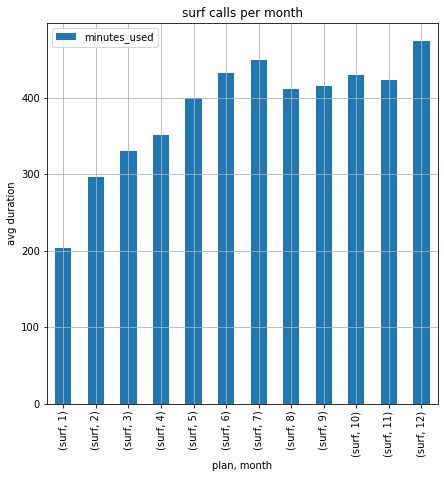

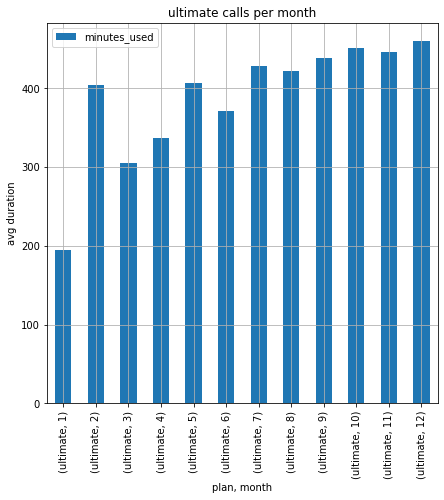

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_per_plan_per_month = megaline.pivot_table(index=['plan','month'],values='minutes_used')
#calls_per_plan_per_month = calls_per_plan_per_month.reset_index()
#don't reset index it makes it harder
calls_per_plan_per_month['minutes_used'] = calls_per_plan_per_month['minutes_used'].apply(np.ceil).astype('int')
calls_per_plan_per_month.loc[('surf',slice(None)),:].plot(title='surf calls per month',xlabel='plan, month',ylabel='avg duration', y='minutes_used', kind='bar',grid=True, figsize=(7,7))
calls_per_plan_per_month.loc[('ultimate',slice(None)),:].plot(title='ultimate calls per month',xlabel='plan, month',ylabel='avg duration', y='minutes_used', kind='bar',grid=True, figsize=(7,7))
#this is me accessing multiindexing
#https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce

Overall, ultimate calls per month is roughly similar to surf calls per month in minutes used.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


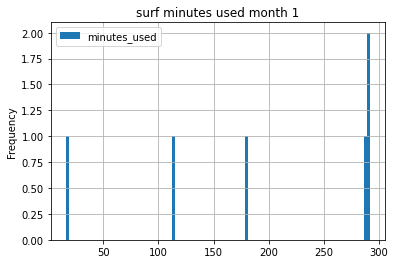

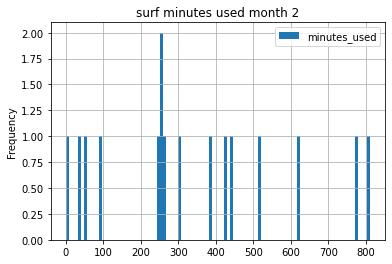

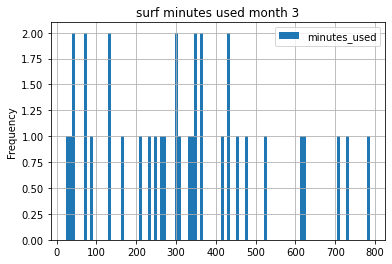

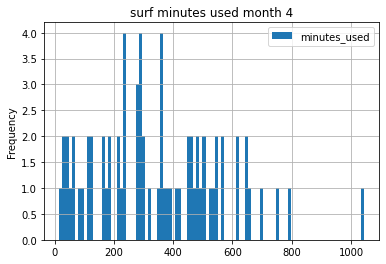

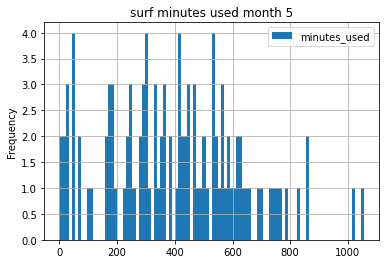

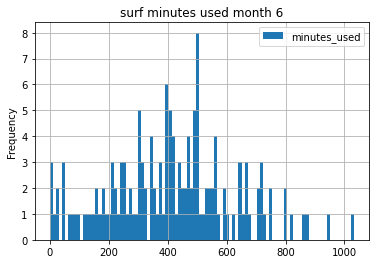

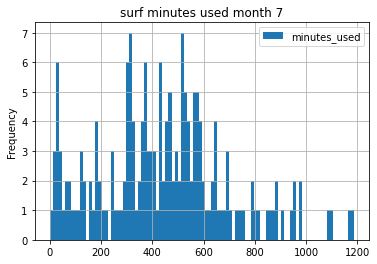

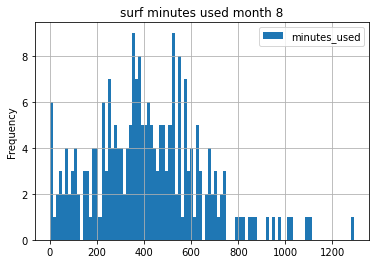

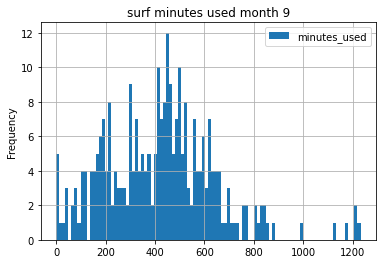

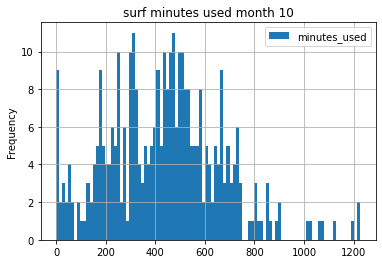

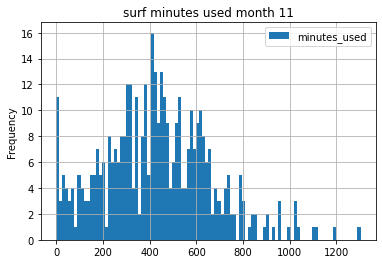

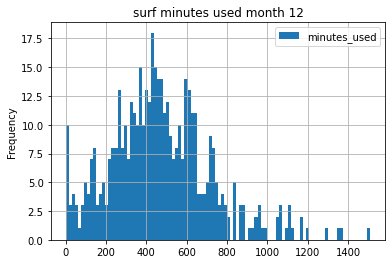

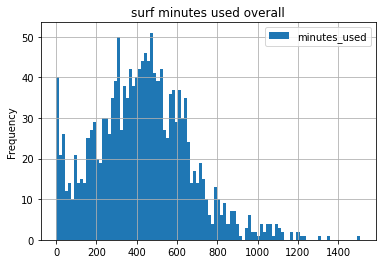

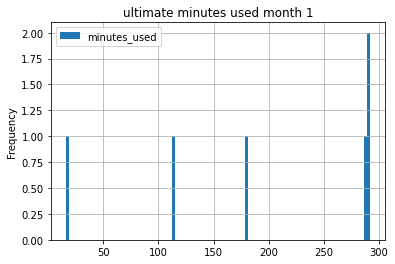

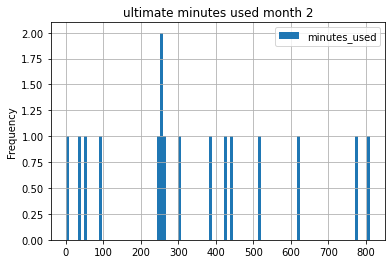

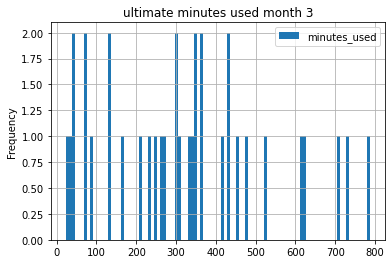

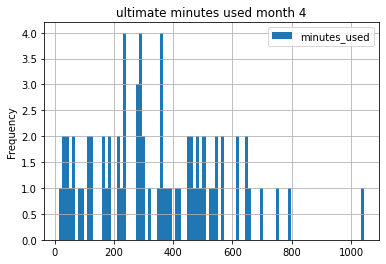

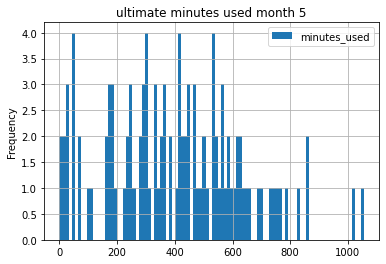

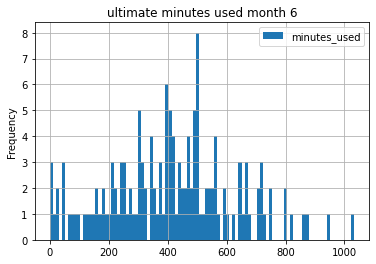

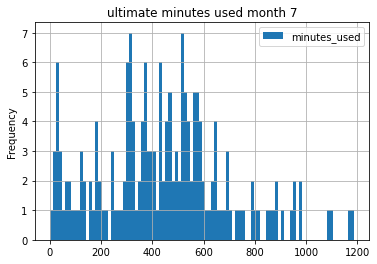

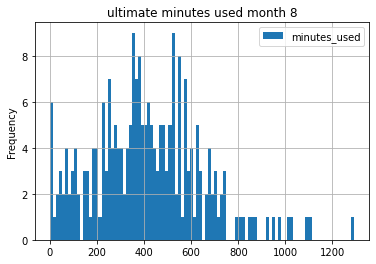

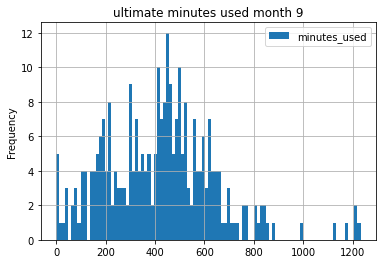

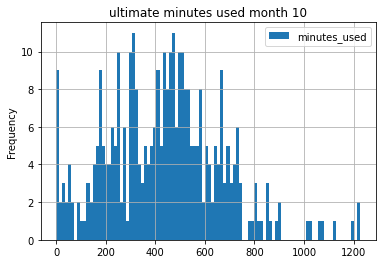

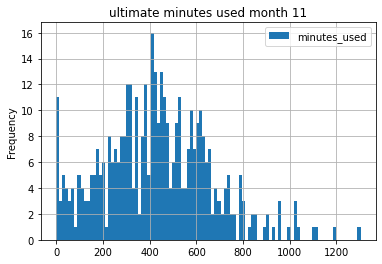

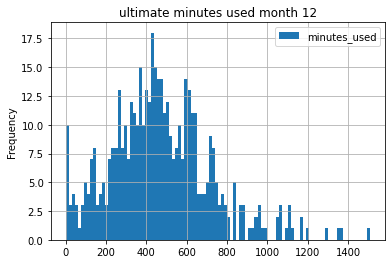

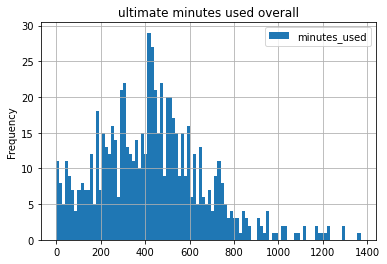

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#https://pastebin.com/3wrDp6np

#a pivot table wouldn't work for the histogram, we need all amounts to iterate through each month.
#"users" confused me in the description, but means the total users minutes, divided by plan, then month.
#so a histograms for each month in each plan, with the frequency of minutes used (they require a plans with a total amount of minutes used = unlimited data).

plans_list = list(dict(megaline['plan'].value_counts()).keys())
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list) #.reverse() returns none, but we want the months ascending.
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['minutes_used'].mean()
        megaline.query('month == @month').plot(kind='hist',title=f'{plan} minutes used month {month}',y='minutes_used',bins=100,grid=True)
        minimum = megaline.query('month == @month')['minutes_used'].min()
        q3 = megaline.query('month == @month')['minutes_used'].quantile(.75)
        #majority of outliers are outside Quartile 3
        #megaline.query('month == @month').plot(kind='hist',title=f'{plan} minutes used month {month} pre quartile 3',y='minutes_used',bins=100,grid=True,range=(minimum,q3))
    megaline.query('plan == @plan').plot(kind='hist',title=f'{plan} minutes used overall',y='minutes_used',bins=100,grid=True)
    

From month 1, both surf and ultimate skew left due more people using up to 300 minutes, however, from then on it skews right, meaning that the mean is greater than the median after the second month ending, the mean ending up between 400 and 500 at the of both plans respective years.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [32]:
# Calculate the mean and the variance of the monthly call duration
#https://pastebin.com/E9Qd6NtM
#https://pastebin.com/Z36qA9nL
#https://pastebin.com/uTpP8354

calls_data = megaline.pivot_table(index=['plan','month'],values='minutes_used',aggfunc=['mean','std','var','median'])
calls_data.columns = ['mean','std','var','median']
calls_data = calls_data.apply(np.ceil).astype(int)
calls_data

mean  std    var  median
plan     month                          
surf     1       203  126  15842     203
         2       297  229  52227     254
         3       330  190  35810     334
         4       352  226  50867     340
         5       400  245  59755     415
         6       432  214  45593     423
         7       450  247  61006     454
         8       411  234  54345     392
         9       415  216  46596     426
         10      430  229  52279     432
         11      424  228  51608     413
         12      474  253  63630     449
ultimate 1       194  129  16573     234
         2       404  278  76890     428
         3       305  249  61985     251
         4       337  187  34889     301
         5       407  210  43842     407
         6       371  207  42504     399
         7       428  270  72564     430
         8       422  232  53646     406
         9       438  239  57071     434
         10      451  233  54262     461
         11      446  247  60594     432
         12      460  251  62504     436

The variance explodes past the first month, due to more calls and minutes being used. While the standard deviation reaches its highest in july for ultimate, and december for surf.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


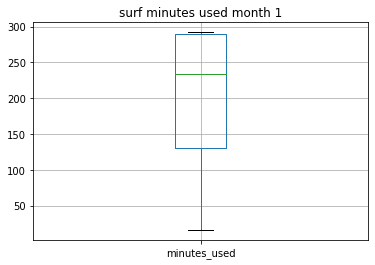

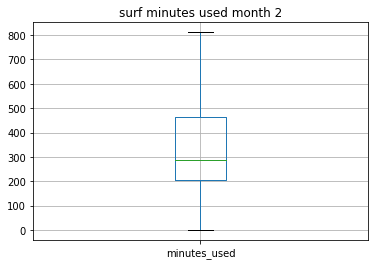

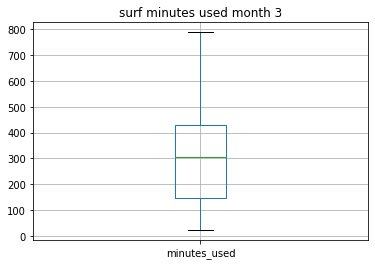

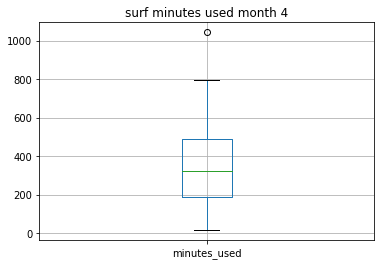

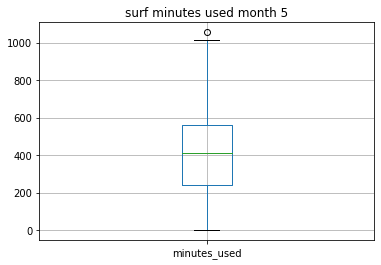

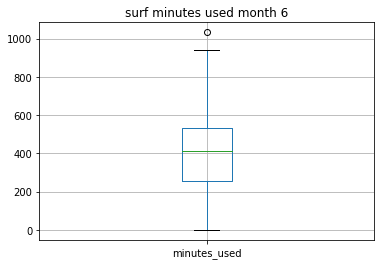

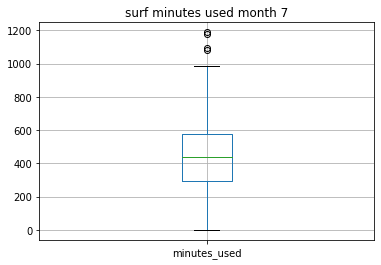

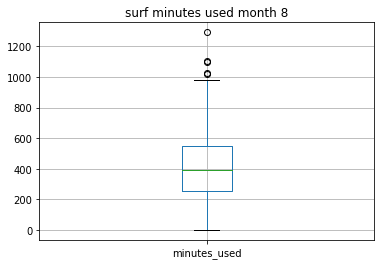

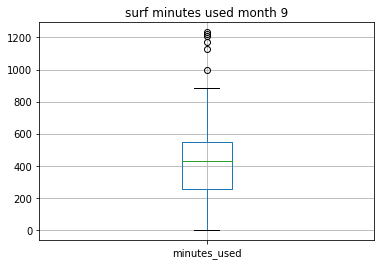

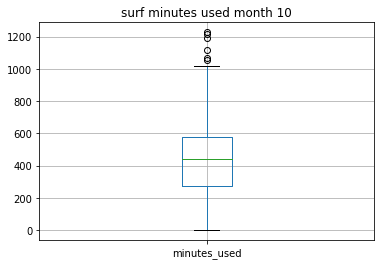

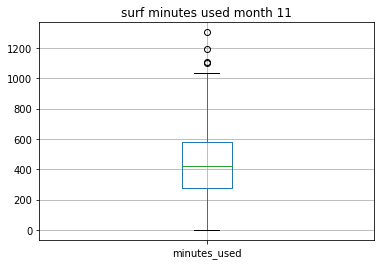

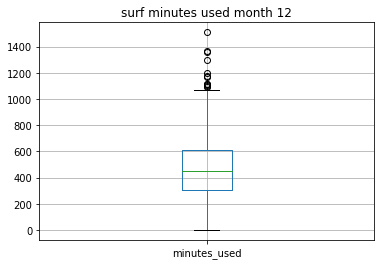

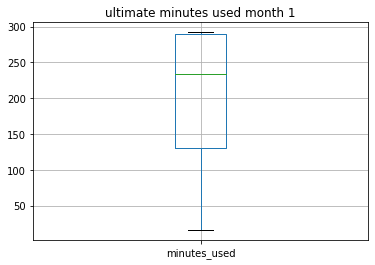

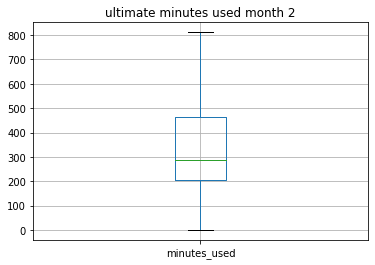

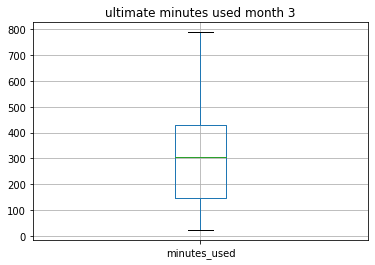

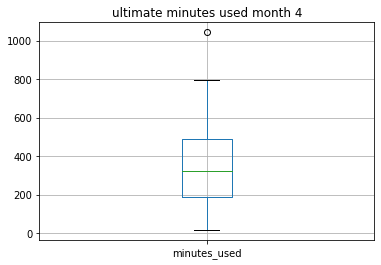

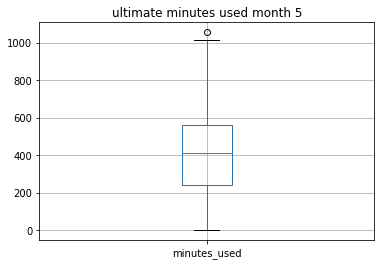

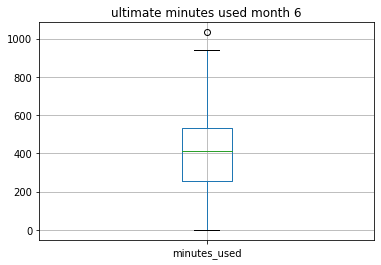

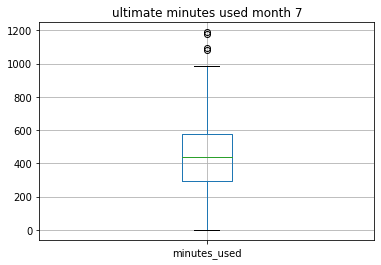

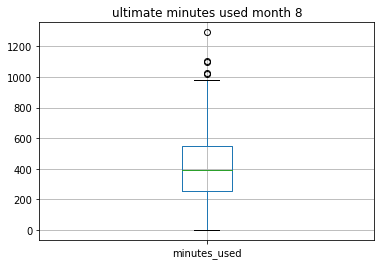

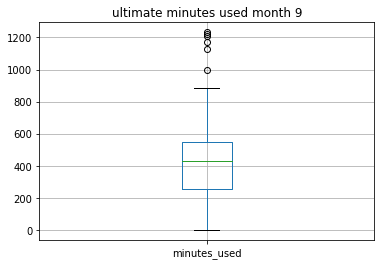

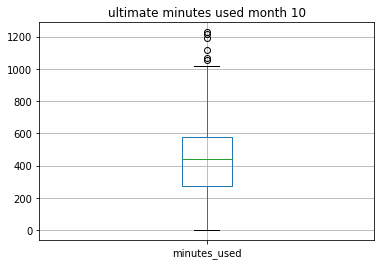

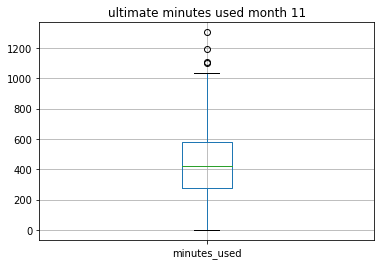

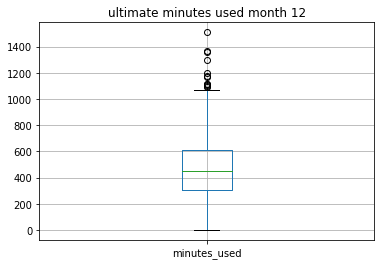

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['minutes_used'].shape[0]
        megaline.query('month == @month').plot(kind='box',title=f'{plan} minutes used month {month}',y='minutes_used',grid=True)   


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

 As the year goes on, the distribution stays around the 300-600 minute range past month 2, for both surf and ultimate, with the outliers using more beyond 1000 minutes by years end. Behavior is overall similar.

### Messages

<AxesSubplot:title={'center':'ultimate messages per month'}, xlabel='month,plan', ylabel='avg number of messages'>

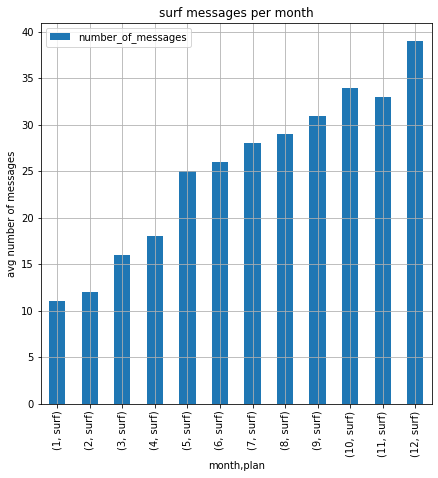

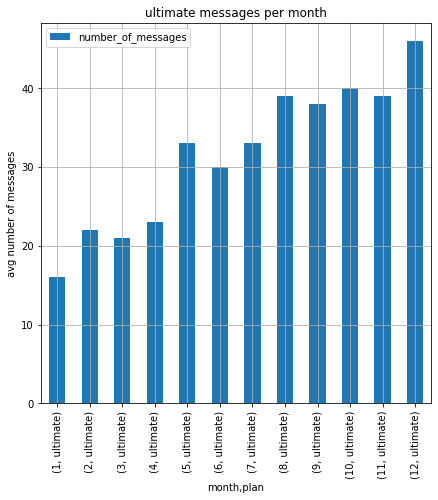

In [34]:
# Compare the number of messages users of each plan tend to send each month
messages_per_plan_per_month = megaline.pivot_table(index=['month','plan'],values='number_of_messages')
#messages_per_plan_per_month = messages_per_plan_per_month.reset_index()
messages_per_plan_per_month
#don't reset index it makes it harder
messages_per_plan_per_month['number_of_messages'] = messages_per_plan_per_month['number_of_messages'].apply(np.ceil).astype('int')
messages_per_plan_per_month
messages_per_plan_per_month.loc[(slice(None),'surf'),:].plot(title='surf messages per month',xlabel='month,plan',ylabel='avg number of messages', y='number_of_messages', kind='bar',grid=True, figsize=(7,7))
messages_per_plan_per_month.loc[(slice(None),'ultimate'),:].plot(title='ultimate messages per month',xlabel='month,plan',ylabel='avg number of messages', y='number_of_messages', kind='bar',grid=True, figsize=(7,7))
#this is me accessing multiindexing
#https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce


Overall, more the average number of messages increase is very similar, ultimate is at least 30 past april, while surf is 25. Ultimate caps past 40 and surf stays under 40.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


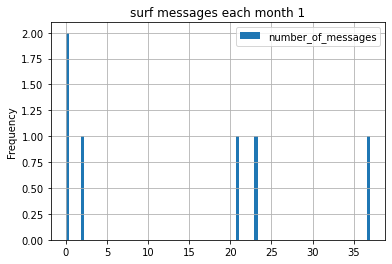

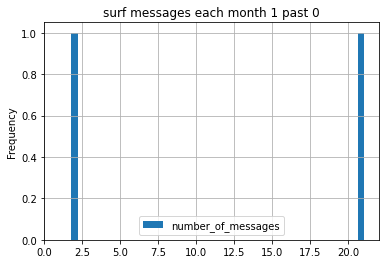

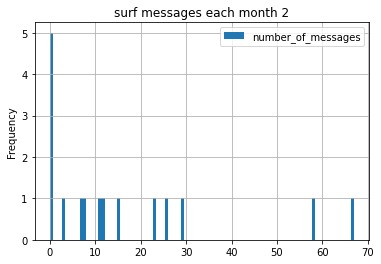

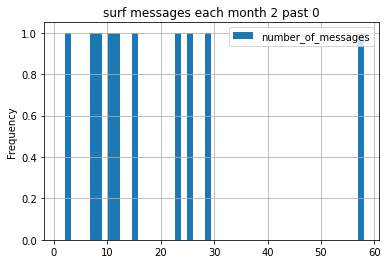

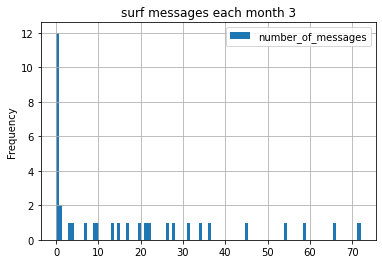

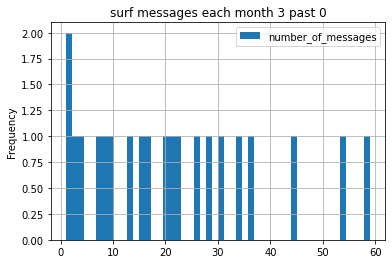

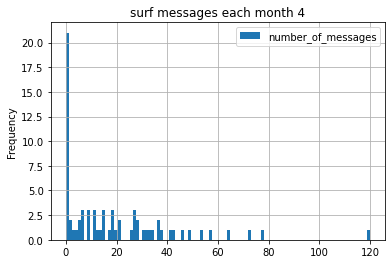

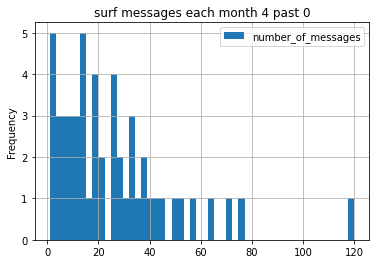

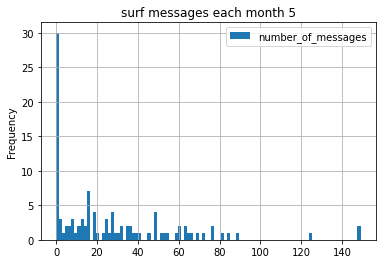

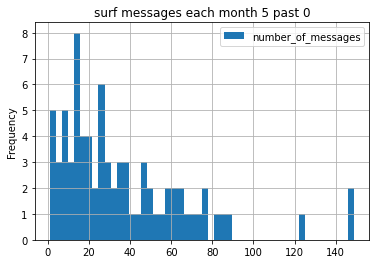

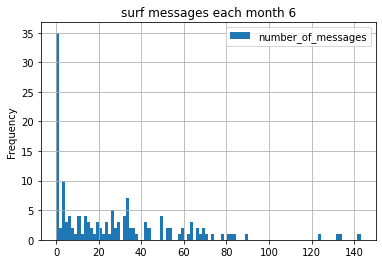

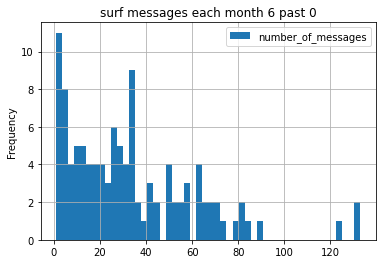

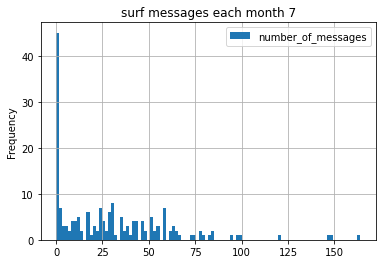

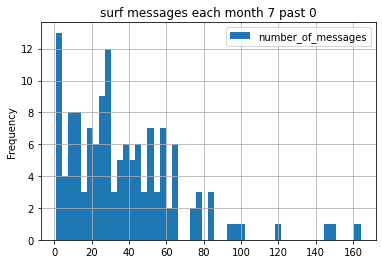

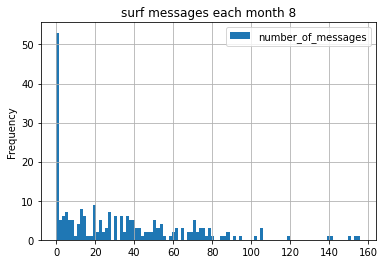

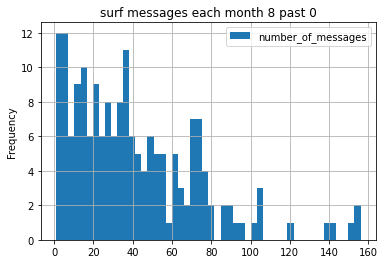

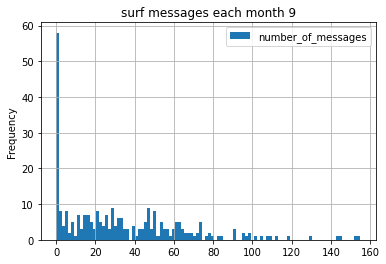

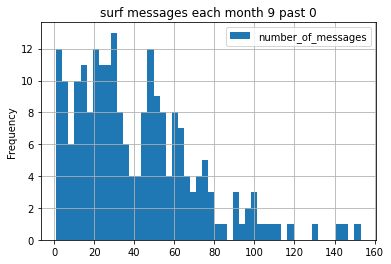

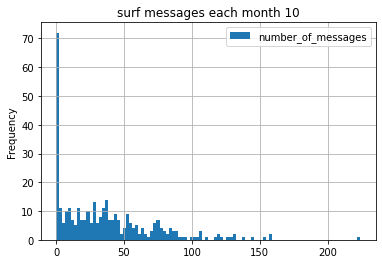

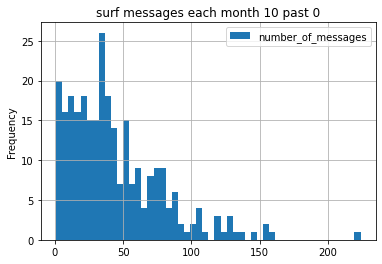

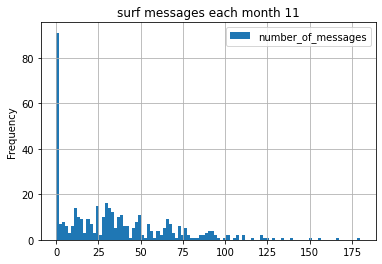

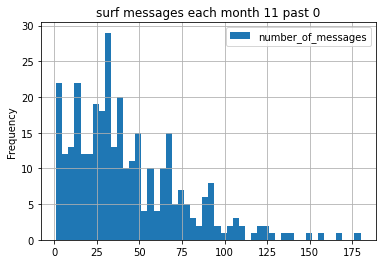

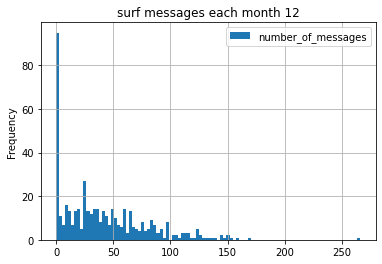

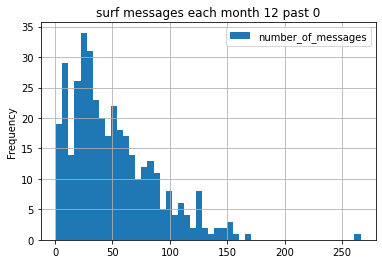

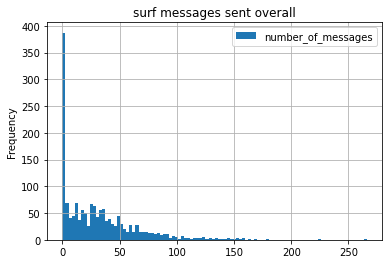

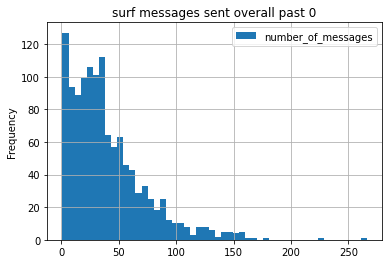

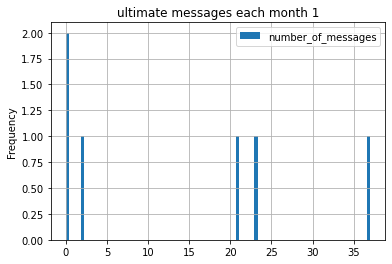

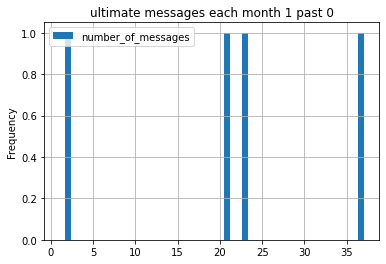

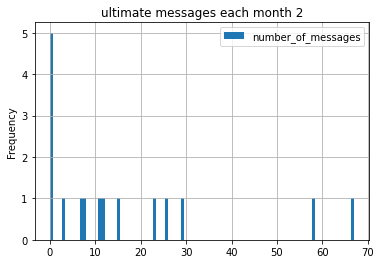

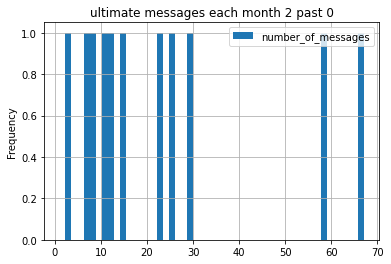

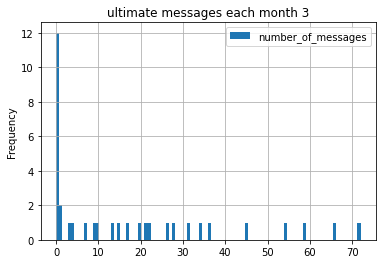

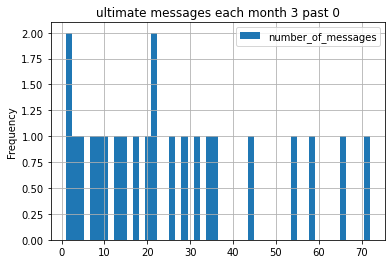

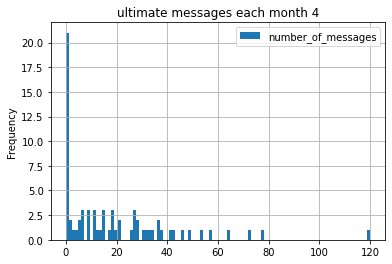

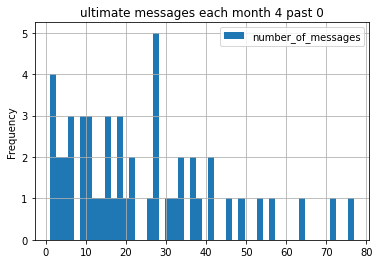

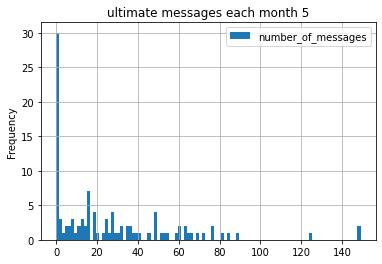

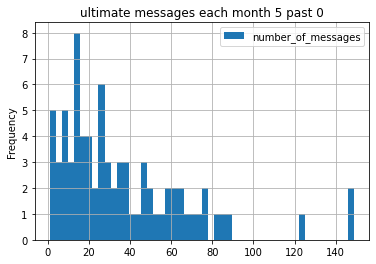

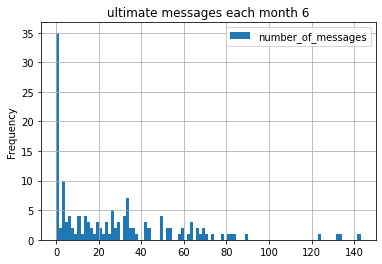

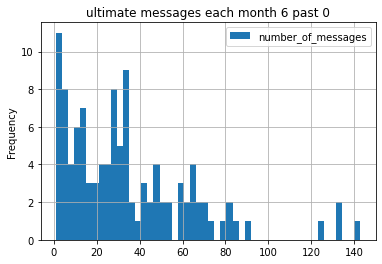

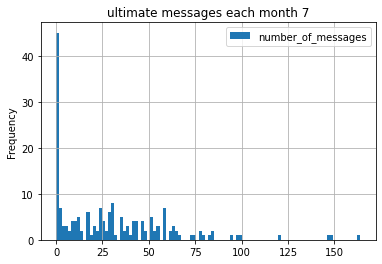

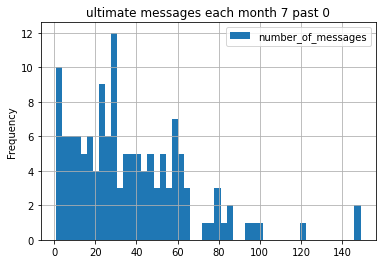

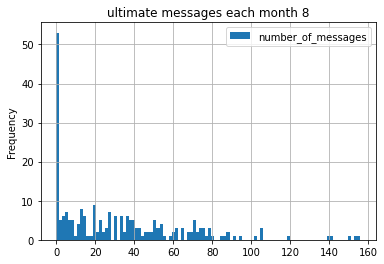

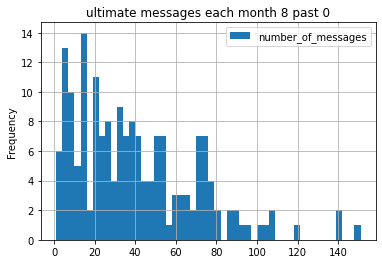

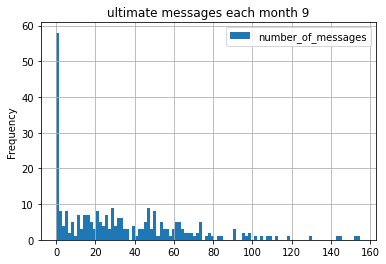

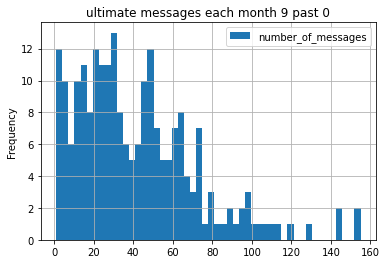

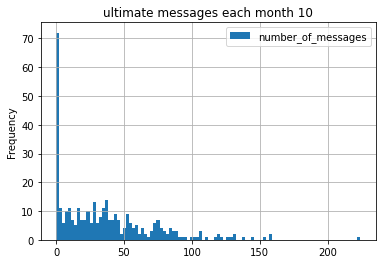

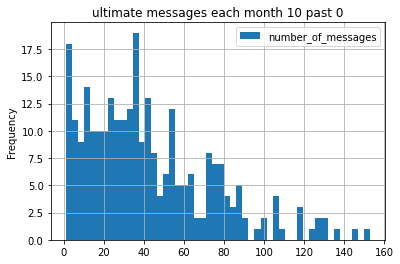

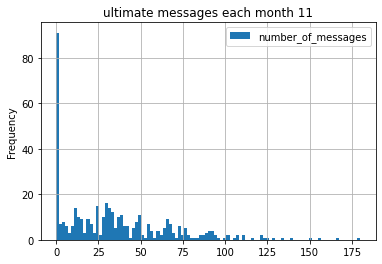

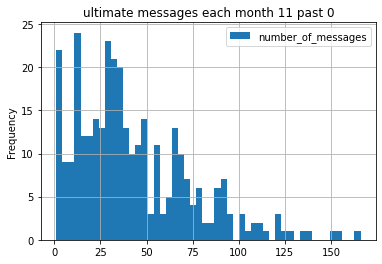

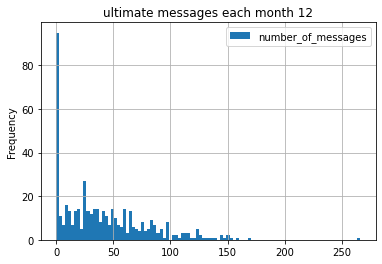

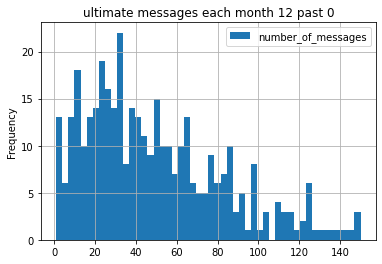

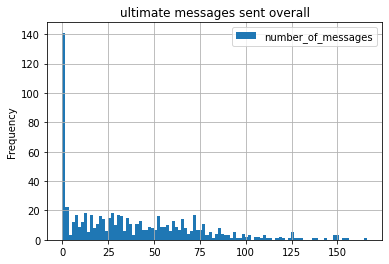

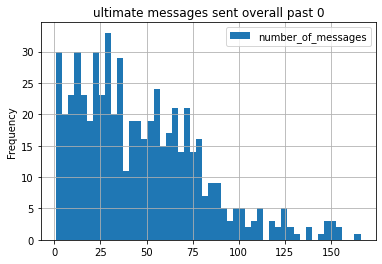

In [35]:
plans_list = list(dict(megaline['plan'].value_counts()).keys())
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['number_of_messages'].mean()
        #print(megaline.query('plan == @plan and month == @month')['number_of_messages'].describe())
        bin_max = megaline.query('plan == @plan and month == @month')['number_of_messages'].max()
        bin_min = megaline.query('plan == @plan and month == @month')['number_of_messages'].min()
        megaline.query('month == @month').plot(kind='hist',title=f'{plan} messages each month {month}',y='number_of_messages',bins=100,grid=True)
        megaline.query('month == @month').plot(kind='hist',title=f'{plan} messages each month {month} past 0',y='number_of_messages',bins=50,grid=True, range=(1,bin_max))
    overall_max = megaline.query('plan == @plan')['number_of_messages'].max()
    megaline.query('plan == @plan').plot(kind='hist',title=f'{plan} messages sent overall',y='number_of_messages',bins=100,grid=True)
    megaline.query('plan == @plan').plot(kind='hist',title=f'{plan} messages sent overall past 0',y='number_of_messages',bins=50,grid=True,range=(1,overall_max))

More people aren't using messages, which is why I made histograms past 0 after each one, in both surf and ultimate. Regardless, both plans skew right, which means the mean messages is greater than the median for both plans.

In [36]:
#https://pastebin.com/yjzyAdBW
messages_data = megaline.pivot_table(index=['plan','month'],values='number_of_messages',aggfunc=['mean','std','var','median'])
messages_data.columns = ['mean','std','var','median']
messages_data = messages_data.apply(np.ceil).astype(int)
messages_data

mean  std   var  median
plan     month                         
surf     1        11   15   221      11
         2        12   20   386       3
         3        16   19   347       7
         4        18   23   502      10
         5        25   30   848      15
         6        26   31   915      15
         7        28   31   924      20
         8        29   33  1030      20
         9        31   32  1004      23
         10       34   36  1276      26
         11       33   33  1066      27
         12       39   39  1459      31
ultimate 1        16   18   314      13
         2        22   22   479      15
         3        21   26   655      12
         4        23   24   545      17
         5        33   37  1298      19
         6        30   30   858      21
         7        33   31   961      28
         8        39   35  1197      36
         9        38   33  1051      32
         10       40   35  1222      35
         11       39   36  1233      32
         12       46   40  1550      41

The variance is overall higher for ultimate than surf, while the standard deviation is only a bit higher.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


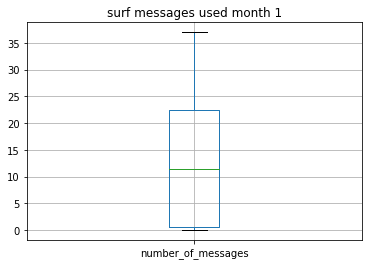

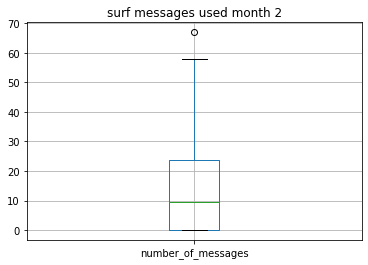

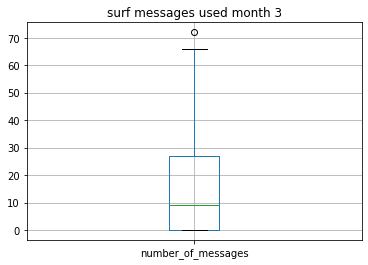

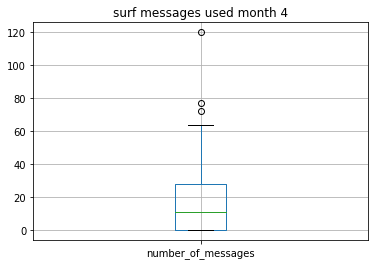

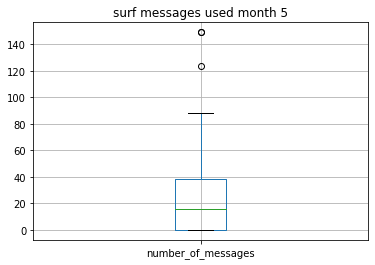

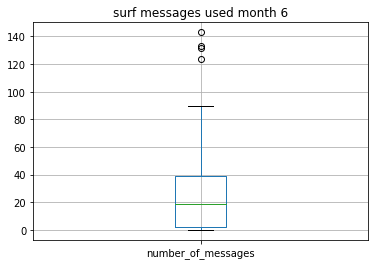

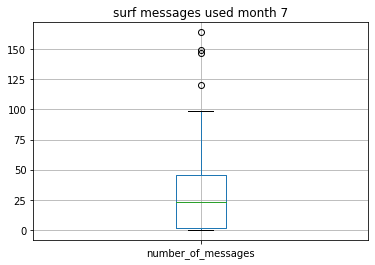

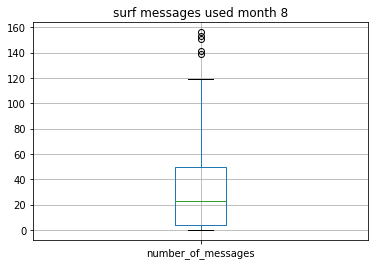

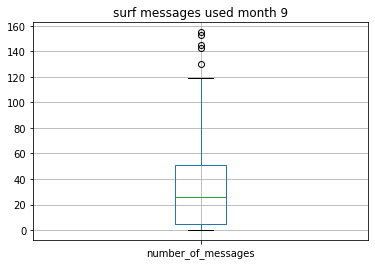

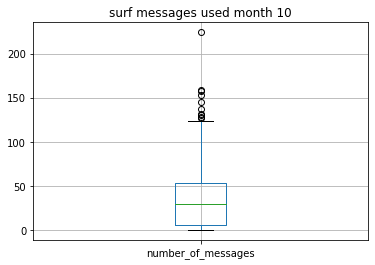

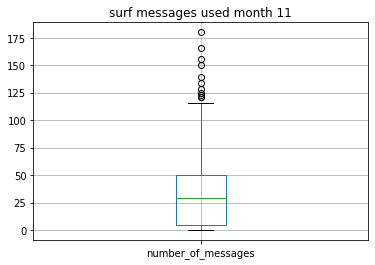

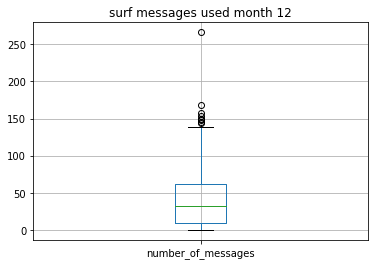

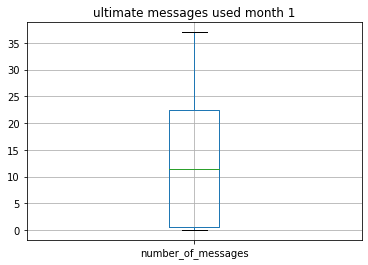

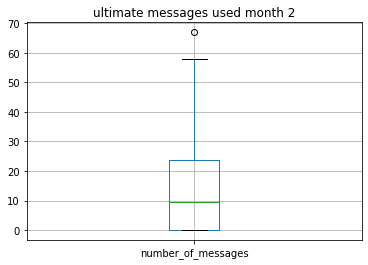

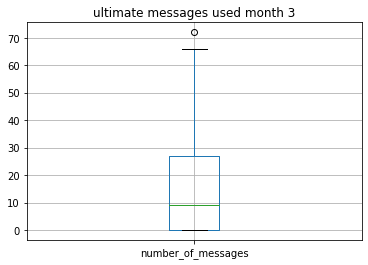

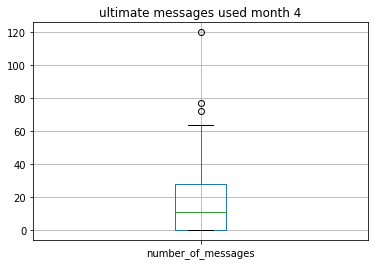

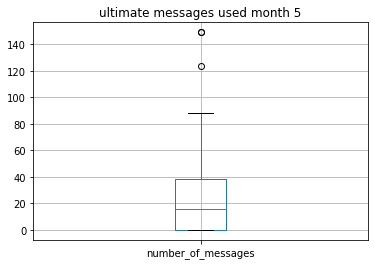

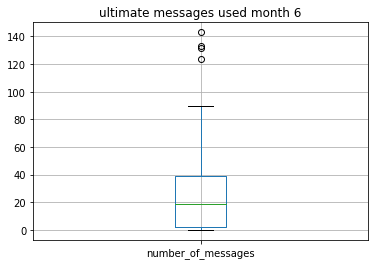

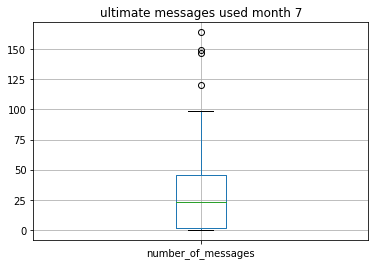

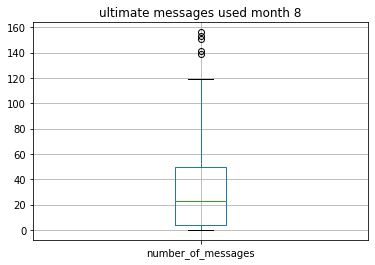

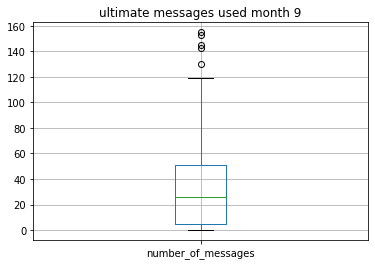

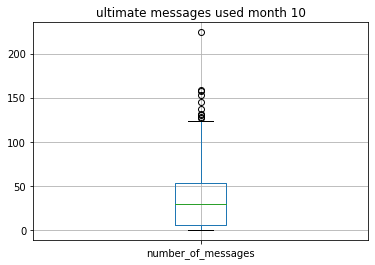

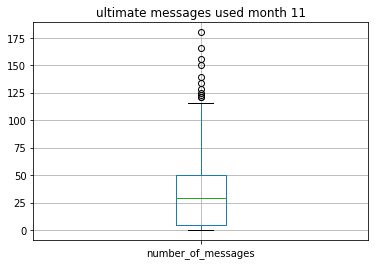

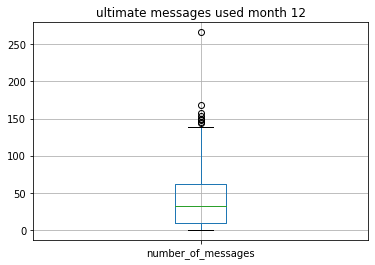

In [37]:
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['number_of_messages'].shape[0]
        bin_max = megaline.query('plan == @plan and month == @month')['number_of_messages'].max()
        bin_min = megaline.query('plan == @plan and month == @month')['number_of_messages'].min()
        megaline.query('month == @month').plot(kind='box',title=f'{plan} messages used month {month}',y='number_of_messages',grid=True)
        #megaline.query('month == @month').plot(kind='box',title=f'{plan} messages used month {month}',y='number_of_messages',grid=True)

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Ultimate's message's means, standard deviation and and variance is overall higher, with more outliers past the 120 range, compared to surf's plan. Both start out closer to zero and skew right, meaning the mean is higher than the median. 

### Internet

<AxesSubplot:title={'center':'ultimate mb used per month'}, xlabel='month,plan', ylabel='avg number of mb'>

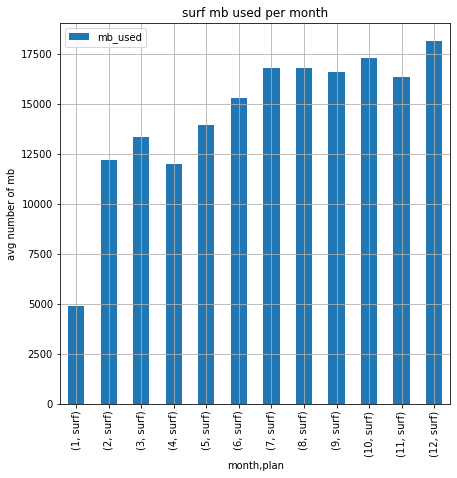

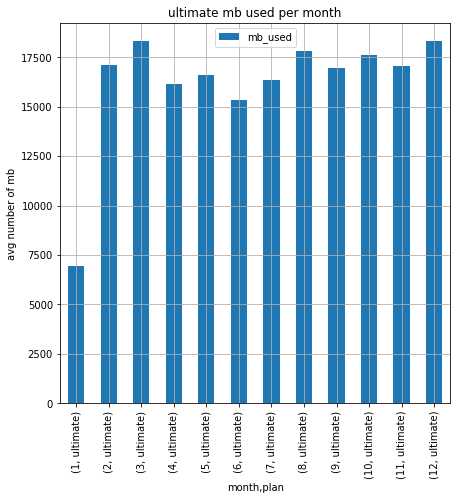

In [38]:
# Compare the amount of internet traffic consumed by users per plan
messages_per_plan_per_month = megaline.pivot_table(index=['month','plan'],values='mb_used')
#messages_per_plan_per_month = messages_per_plan_per_month.reset_index()
messages_per_plan_per_month
#don't reset index it makes it harder
messages_per_plan_per_month['mb_used'] = messages_per_plan_per_month['mb_used'].apply(np.ceil).astype('int')
messages_per_plan_per_month
messages_per_plan_per_month.loc[(slice(None),'surf'),:].plot(title='surf mb used per month',xlabel='month,plan',ylabel='avg number of mb', y='mb_used', kind='bar',grid=True, figsize=(7,7))
messages_per_plan_per_month.loc[(slice(None),'ultimate'),:].plot(title='ultimate mb used per month',xlabel='month,plan',ylabel='avg number of mb', y='mb_used', kind='bar',grid=True, figsize=(7,7))
#this is me accessing multiindexing
#https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce


Ultimate messages overall for the first month are higher. Past february, all the ultimate messages are over 15000, while surf barely makes that before midyear.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


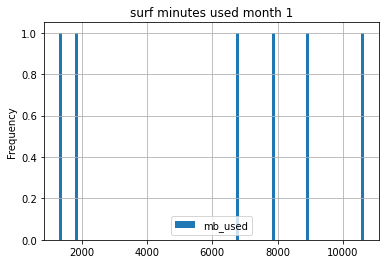

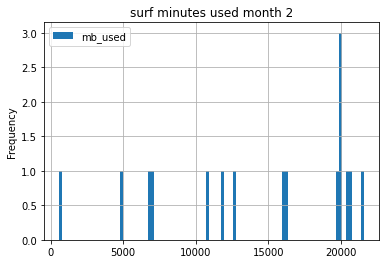

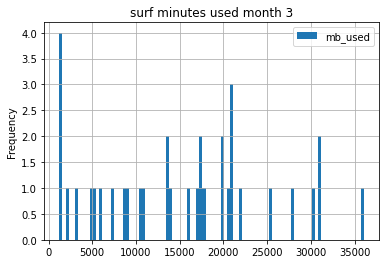

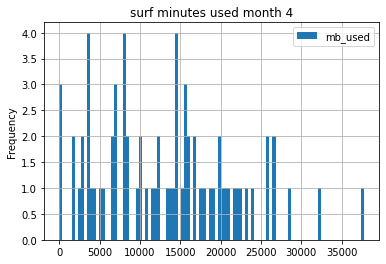

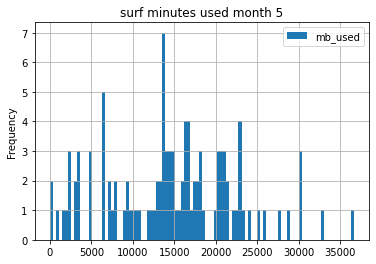

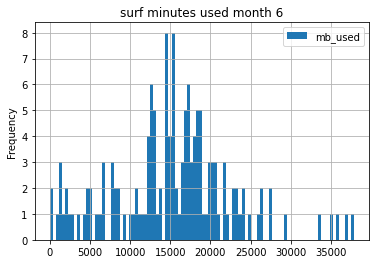

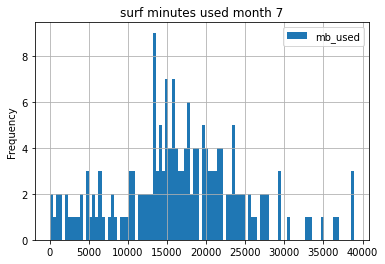

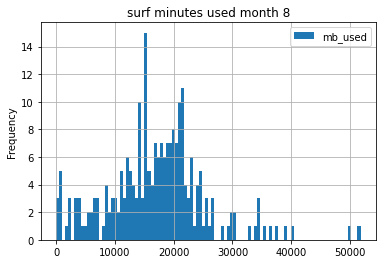

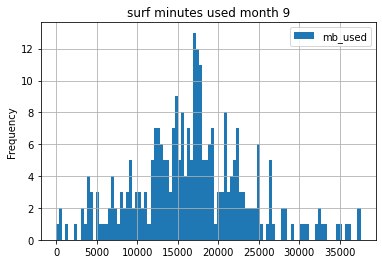

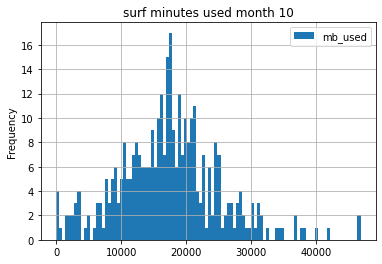

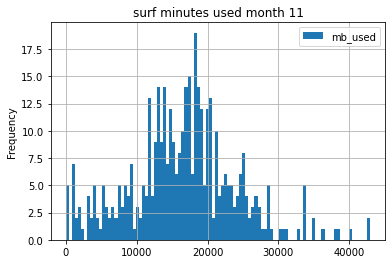

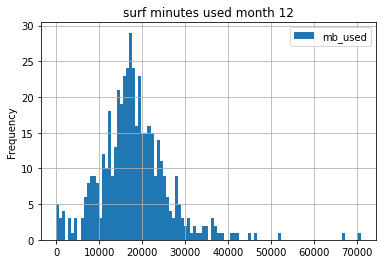

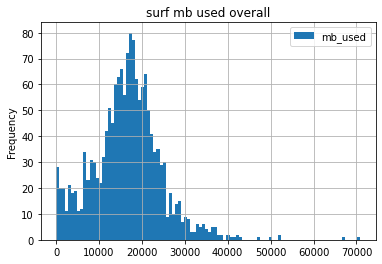

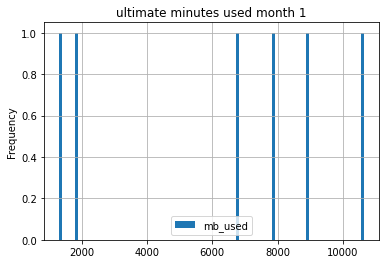

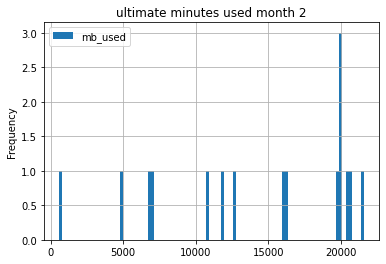

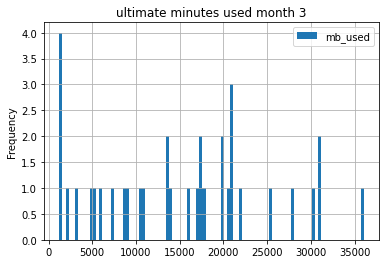

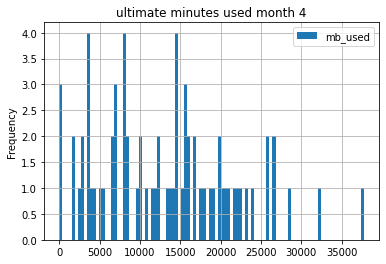

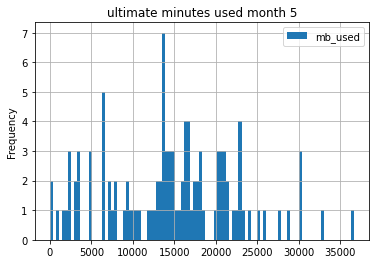

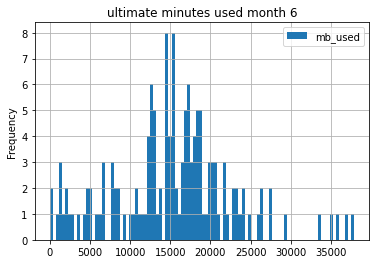

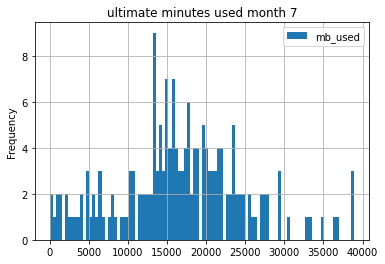

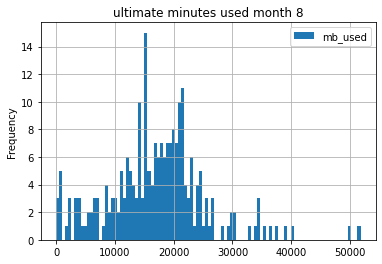

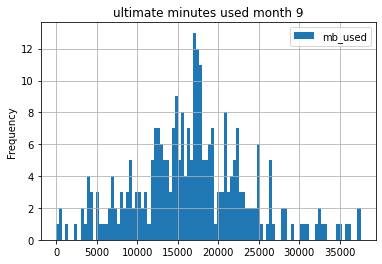

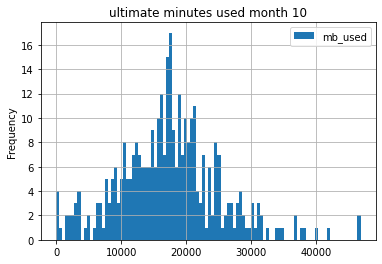

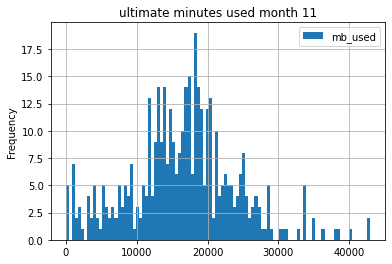

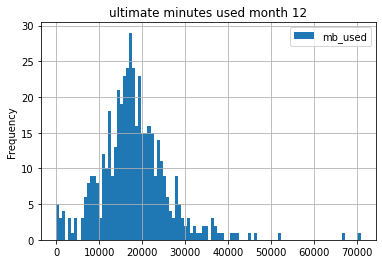

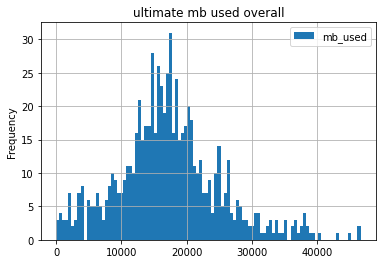

In [39]:
plans_list = list(dict(megaline['plan'].value_counts()).keys())
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['mb_used'].mean()
        megaline.query('month == @month').plot(kind='hist',title=f'{plan} minutes used month {month}',y='mb_used',bins=100,grid=True)
    megaline.query('plan == @plan').plot(kind='hist',title=f'{plan} mb used overall',y='mb_used',bins=100,grid=True)

Uniform distribution of mb_used at the beginning of the year. Then the mean develops more clearly throughout the year for both surf and ultimate.

In [40]:
#https://pastebin.com/9wyEYe1X
internet_data = megaline.pivot_table(index=['plan','month'],values='mb_used',aggfunc=['mean','std','var','median'])
internet_data.columns = ['mean','std','var','median']
internet_data = internet_data.apply(np.ceil).astype(int)
internet_data


mean    std        var  median
plan     month                                 
surf     1       4874   4271   18240800    4874
         2      12179   6609   43674136   11828
         3      13345   8262   68244910   13867
         4      11984   7685   59043998   11814
         5      13936   7841   61476467   13953
         6      15302   7010   49132670   15479
         7      16784   8043   64686809   16876
         8      16795   8640   74636482   16879
         9      16591   7164   51316165   16968
         10     17311   7908   62527003   17460
         11     16339   7562   57175072   16813
         12     18132   8494   72147477   17722
ultimate 1       6918   4049   16393678    7860
         2      17129   6136   37647106   20085
         3      18322  11847  140339073   20812
         4      16122   9404   88429502   15651
         5      16624   7536   56788386   16499
         6      15338   8487   72014253   15342
         7      16345   8272   68418154   15068
         8      17815   7775   60447216   17954
         9      16970   7025   49339255   16434
         10     17613   7550   56995452   16969
         11     17034   7589   57589238   17130
         12     18323   7867   61880760   17346

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


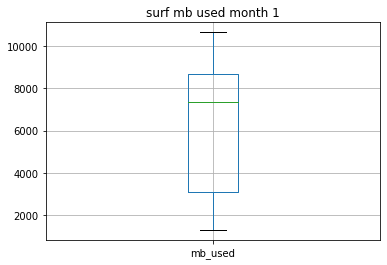

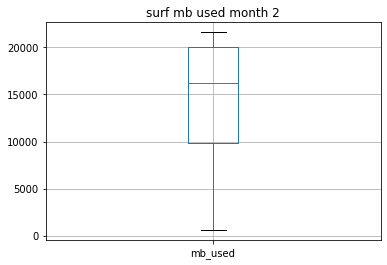

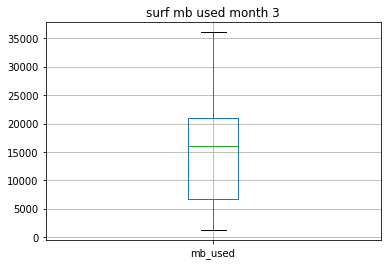

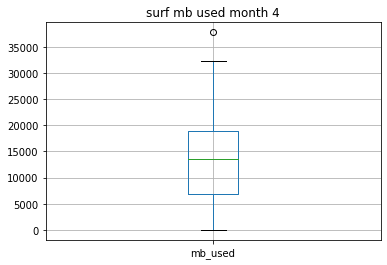

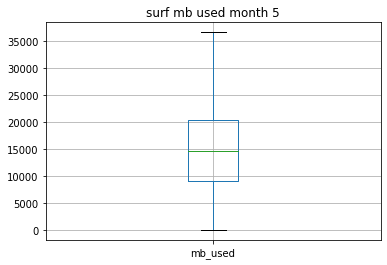

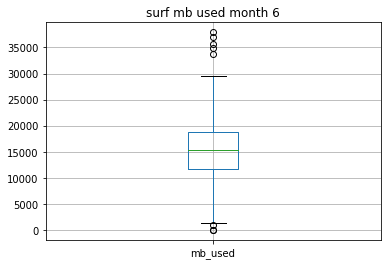

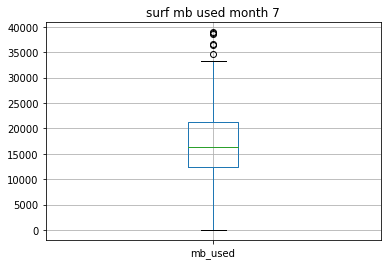

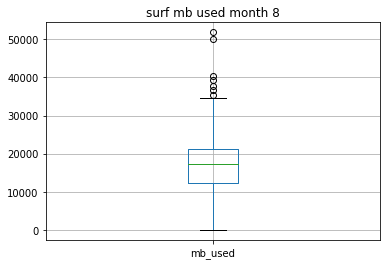

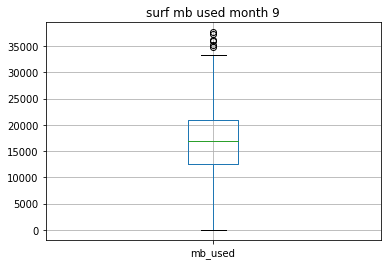

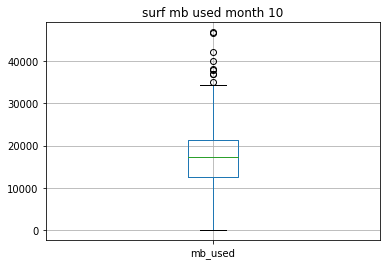

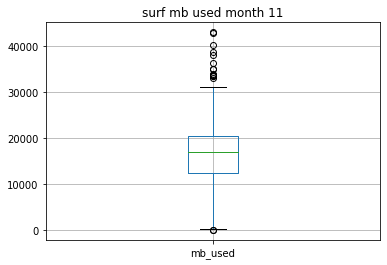

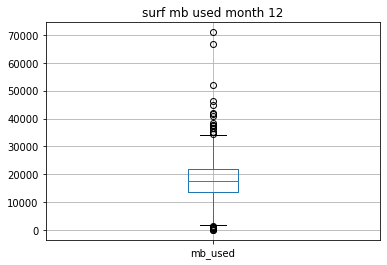

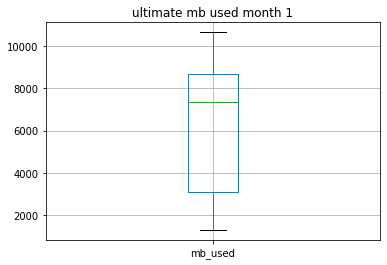

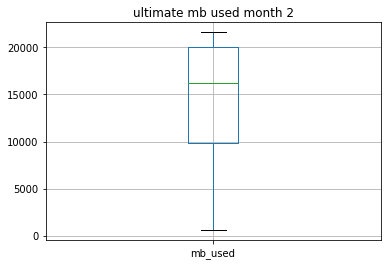

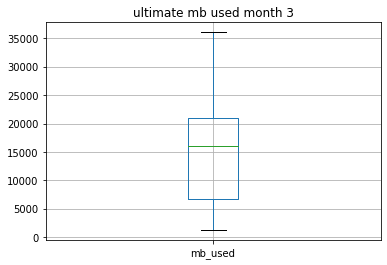

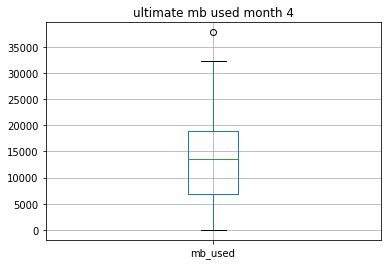

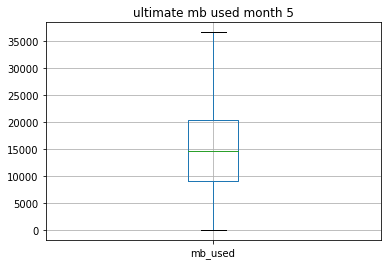

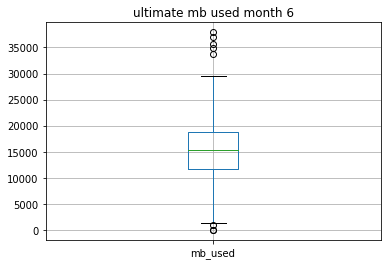

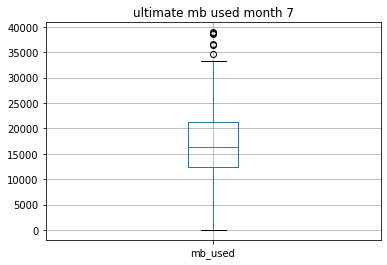

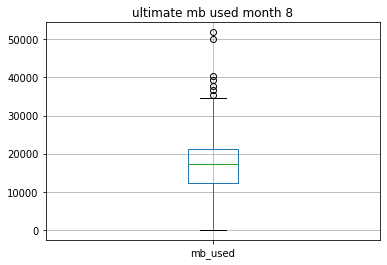

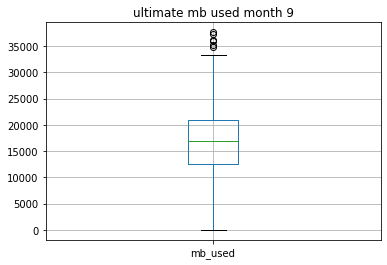

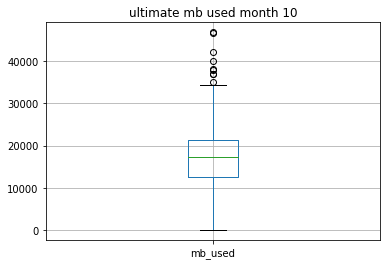

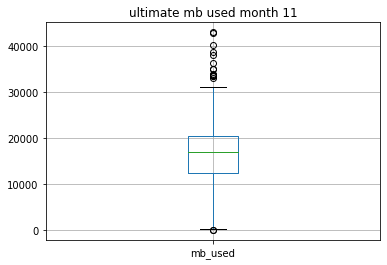

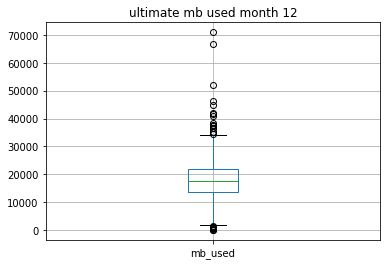

In [41]:
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['mb_used'].shape[0]
        megaline.query('month == @month').plot(kind='box',title=f'{plan} mb used month {month}',y='mb_used',grid=True)  

No big outliers until midyear for both ultimate and surf. Similarly, they both have outliers grouping between the 35000 to 50000 range.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

<AxesSubplot:title={'center':'ulimate avg revenue per month'}, xlabel='month,plan', ylabel='avgrevenue'>

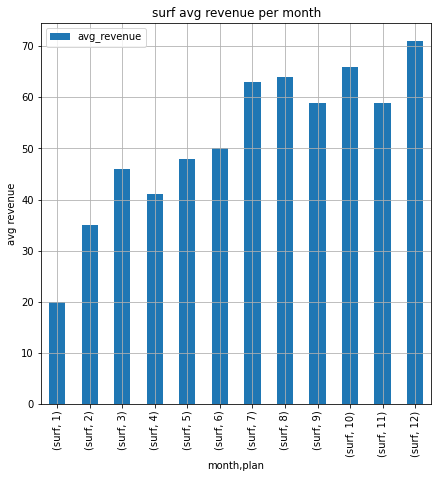

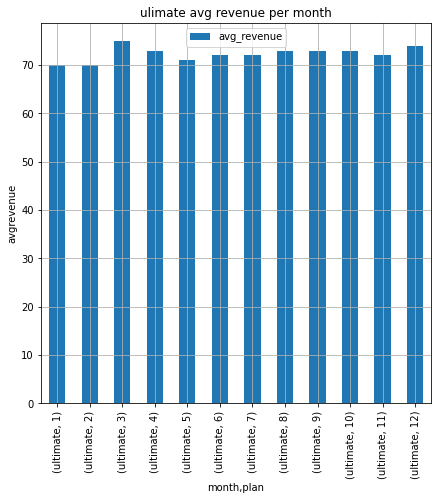

In [42]:
#https://pastebin.com/HnAWrxj8
revenue_per_plan_per_month = megaline.pivot_table(index=['plan','month'],values='total_this_month',aggfunc=['mean'])
revenue_per_plan_per_month = revenue_per_plan_per_month.apply(np.ceil).astype('int')
revenue_per_plan_per_month.columns = ['avg_revenue']
revenue_per_plan_per_month
revenue_per_plan_per_month.loc[('surf',slice(None)),:].plot(title='surf avg revenue per month',xlabel='month,plan',ylabel='avg revenue', y='avg_revenue', kind='bar',grid=True, figsize=(7,7))
revenue_per_plan_per_month.loc[('ultimate',slice(None)),:].plot(title='ulimate avg revenue per month',xlabel='month,plan',ylabel='avgrevenue', y='avg_revenue', kind='bar',grid=True, figsize=(7,7))

Overall higher revenue across the board for ultimate all 70 or more, due to the higher price.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


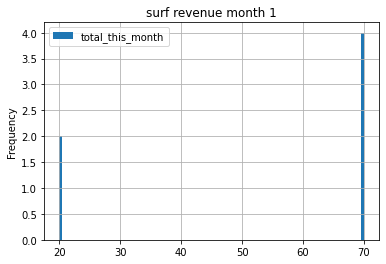

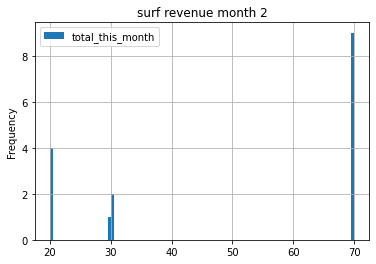

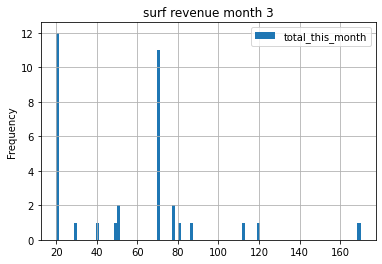

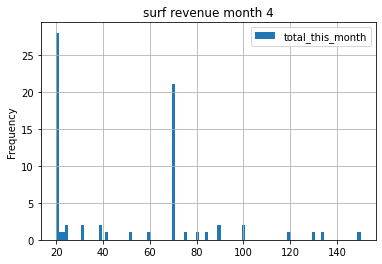

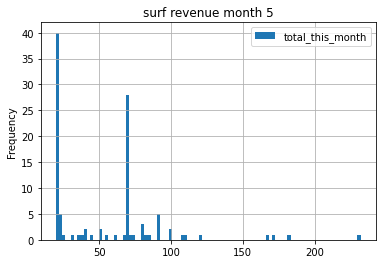

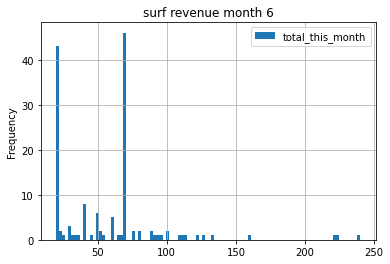

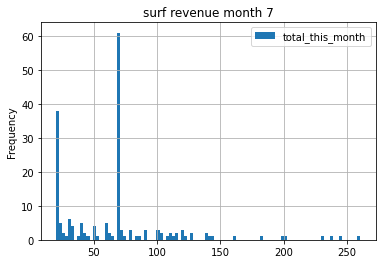

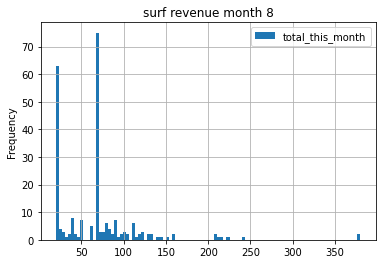

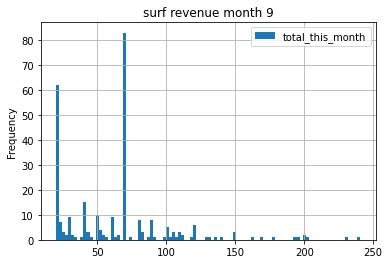

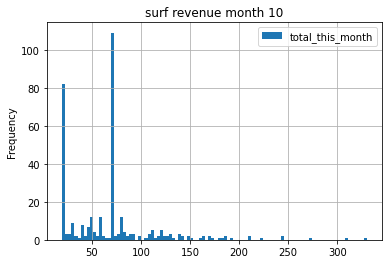

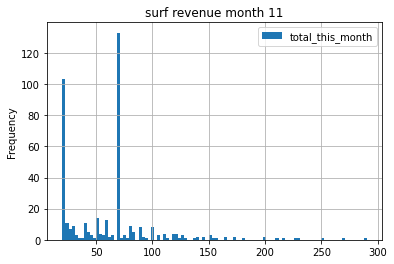

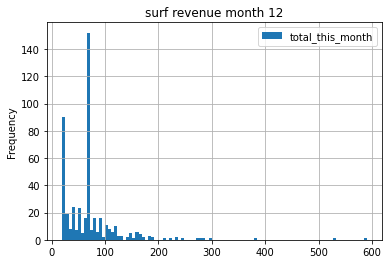

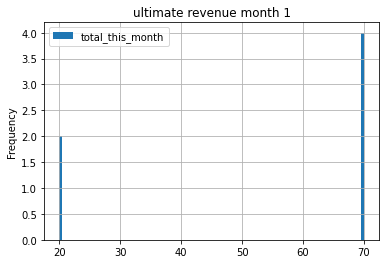

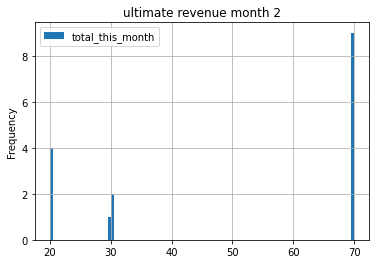

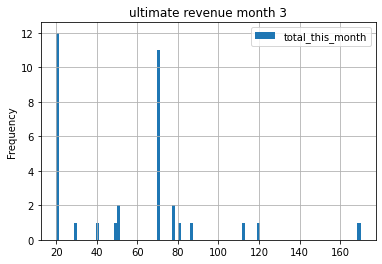

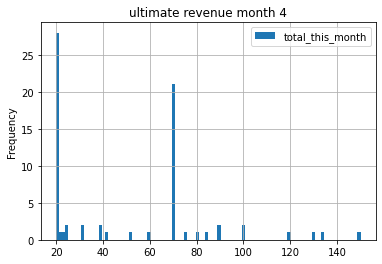

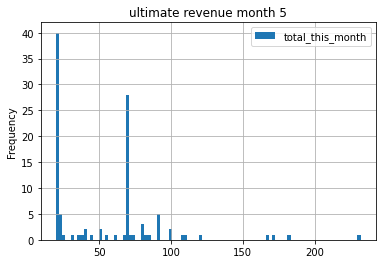

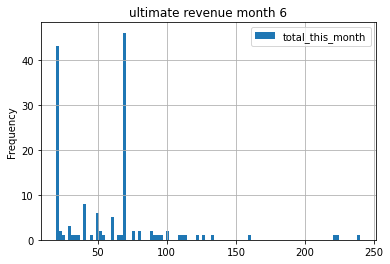

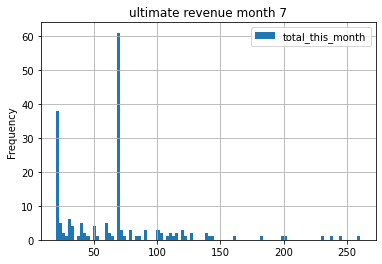

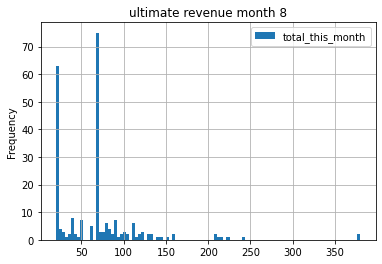

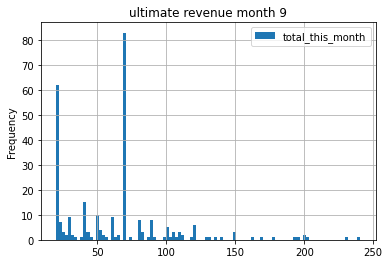

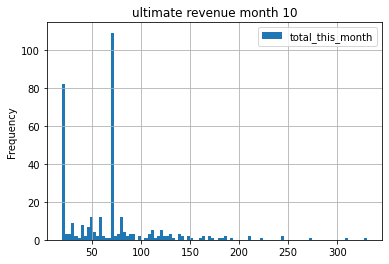

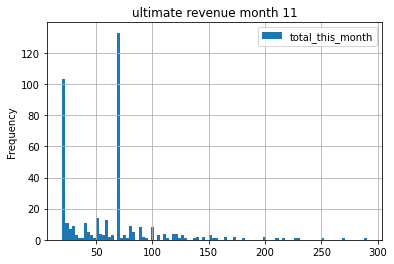

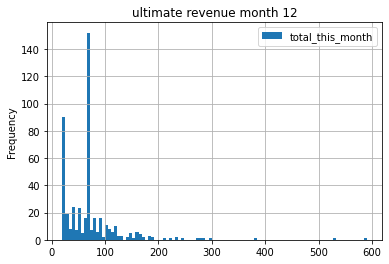

In [43]:
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['minutes_used'].mean()
        megaline.query('month == @month').plot(kind='hist',title=f'{plan} revenue month {month}',y='total_this_month',bins=100,grid=True)   

Both plans skew left until march. Then there is a huge spike in revenue at the prices of the plans themselves, 20 and 70

In [44]:
revenue_data = megaline.pivot_table(index=['plan','month'],values='total_this_month',aggfunc=['mean','std','var','median'])
revenue_data.columns = ['mean','std','var','median']
revenue_data[['mean','median']] = revenue_data[['mean','median']].round(decimals=2)
revenue_data[['std','var']] = revenue_data[['std','var']].apply(np.ceil).astype('int')
revenue_data

mean  std   var  median
plan     month                          
surf     1      20.00    0     0   20.00
         2      34.40   21   429   29.57
         3      45.94   39  1513   20.00
         4      40.71   35  1199   20.00
         5      47.63   45  1968   21.74
         6      49.28   45  1989   30.15
         7      62.67   55  2944   40.33
         8      63.93   60  3588   41.98
         9      58.22   48  2248   40.04
         10     65.34   57  3200   50.00
         11     58.00   50  2495   40.00
         12     70.56   68  4605   50.00
ultimate 1      70.00    0     0   70.00
         2      70.00    0     0   70.00
         3      74.67   13   146   70.00
         4      73.00   11   121   70.00
         5      70.72    4    16   70.00
         6      71.64    9    76   70.00
         7      71.90   11   105   70.00
         8      72.86   13   155   70.00
         9      72.03    9    76   70.00
         10     72.31   14   170   70.00
         11     71.71   10    95   70.00
         12     73.29   15   213   70.00

Ulimate has uniform deviation until march. Surf has has it only fill february. Median for ultimate is the price of the plan. Everything slowly increases for surf.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


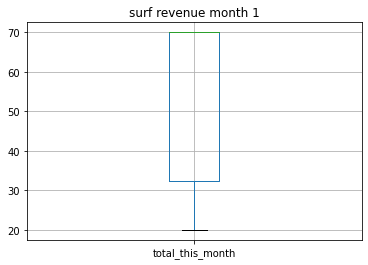

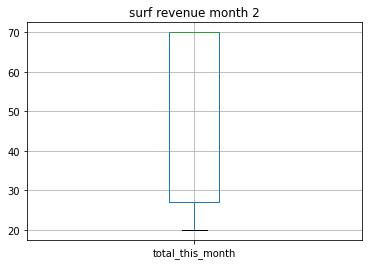

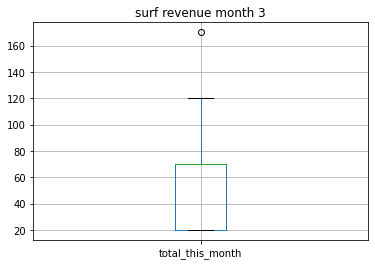

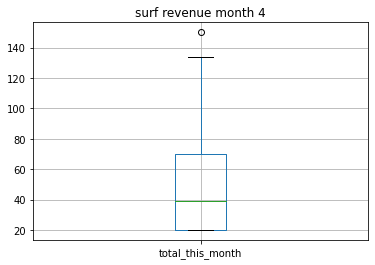

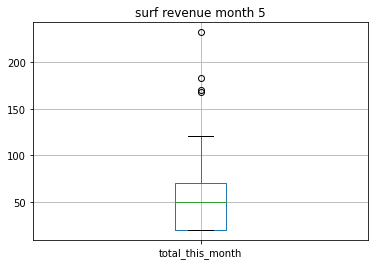

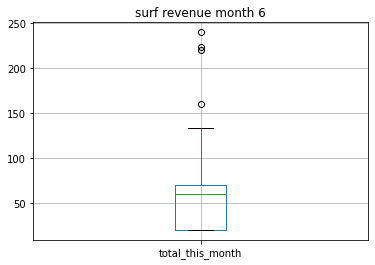

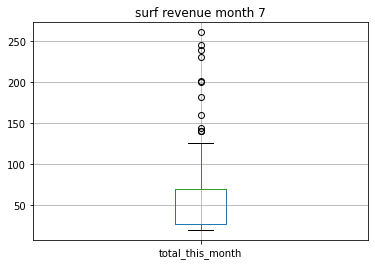

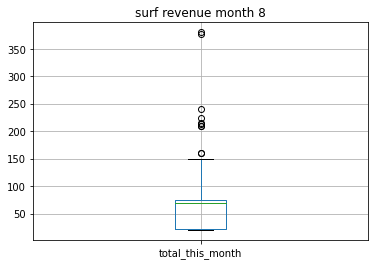

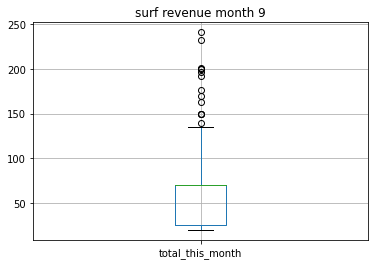

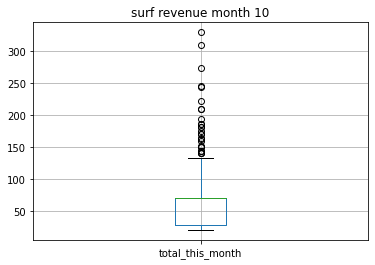

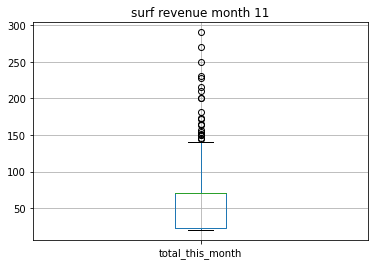

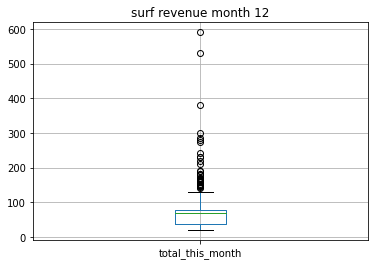

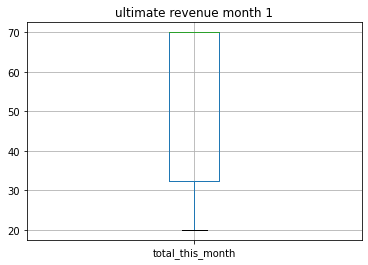

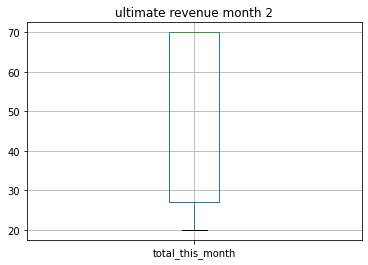

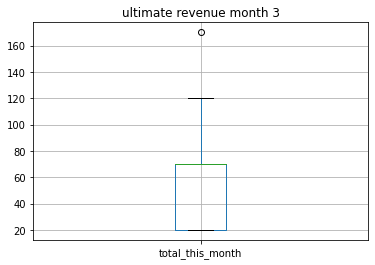

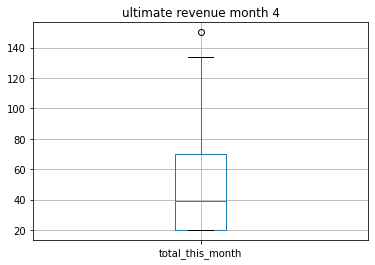

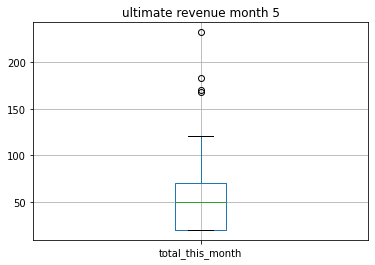

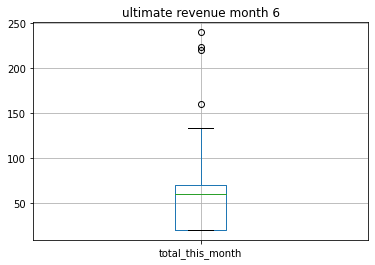

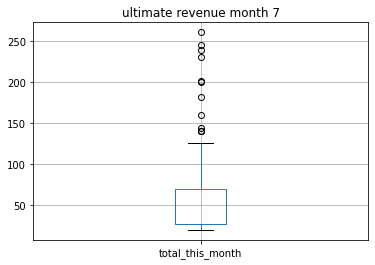

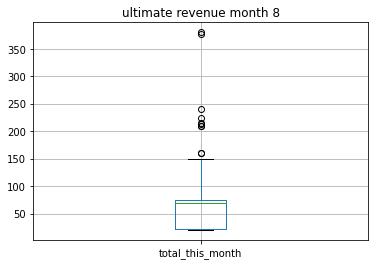

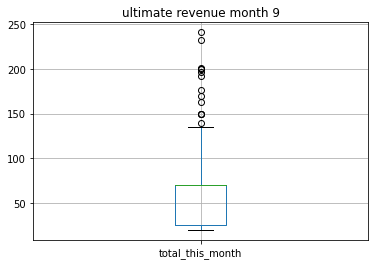

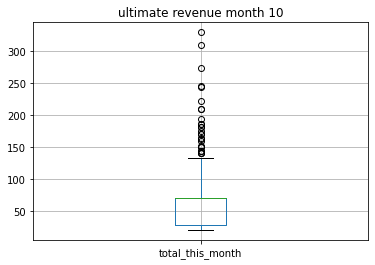

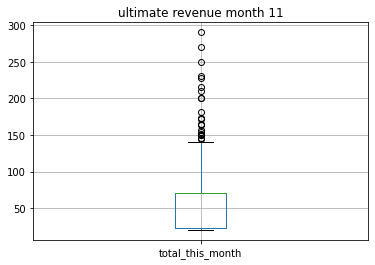

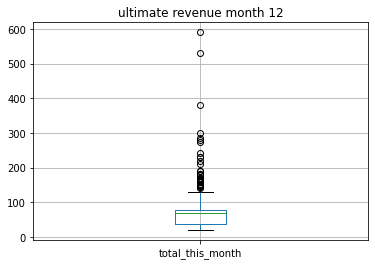

In [45]:
for plan in plans_list:
    new_list = list(dict(megaline.query('plan == @plan')['month'].value_counts()).keys())
    new_list = reversed(new_list)
    for month in new_list:
        #bin_size = megaline.query('plan == @plan and month == @month')['minutes_used'].shape[0]
        megaline.query('month == @month').plot(kind='box',title=f'{plan} revenue month {month}',y='total_this_month',grid=True)

Different starting points based on price. But outliers group at 150-300 for surf and ultimate. 

[Formulate conclusions about how the revenue differs between the plans.]

Higher pricing = More Uniform Revenue. Ultimate makes more money overall even if the outliers are both similiar in each plan.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [46]:
# Test the hypotheses
#We'll choose samples from the end of the year.

#print(megaline.query('plan == "surf" and month == 12')['total_this_month'].shape[0]) 
#print(megaline.query('plan == "ultimate" and month == 12')['total_this_month'].shape[0])

sample_1 = list(megaline.query('plan == "surf"')['total_this_month'].head(100)) #the sample sizes need to be equal.
sample_2 = list(megaline.query('plan == "ultimate"')['total_this_month'].head(100))

results = st.ttest_ind(sample_1, sample_2, equal_var = False) #We consider the variances not equal as in 1.14.

alpha = 0.05 #critical statistical significance level. 
#The significance level is the total probability that an empirically measured value will be far from the mean. 

#is less than alpha, we accept the hypothesis that both are equal.

#since the p-value based on the value not being equal, we subtract from 1 rather than by itself.

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
    print("The means of both are the different.")
else:
    print('We cannot reject the null hypothesis')
    print("The means of both are the same.")


p-value:  0.00019365287734332472
We reject the null hypothesis
The means of both are the different.


The null hypothesis is false. They are different plans, leading to different average revenues. The price does make a difference.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [47]:
# Test the hypotheses
sample1 = list(megaline.query('state == "ny" or state == "nj"')['total_this_month'].head(100))
sample2 = list(megaline.query('state != "ny" or state != "nj"')['total_this_month'].head(100))

results = st.ttest_ind(sample_1, sample_2, equal_var = False) #We consider the variances not equal as in 1.14.

alpha = 0.05 #critical statistical significance level. 
#The significance level is the total probability that an empirically measured value will be far from the mean. 

#is less than alpha, we accept the hypothesis that both are equal.

#since the p-value based on the value not being equal, we subtract from 1 rather than by itself.

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
    print("The means of both are the different.")
else:
    print('We cannot reject the null hypothesis')
    print("The means of both are the same.")
    


p-value:  0.00019365287734332472
We reject the null hypothesis
The means of both are the different.


The null hypothesis is False. They are different plans, leading to different average revenues. The area does make a difference.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Surf users eventually end up paying the same amount at the end of the year. Even though surf has more users, due to saving money, eventually at the end of the year the revenue is the same. Surf users use overall less data, messages and internet, though not by much and save money because of it. Because people are willing to pay extra for a premium service plan, Ultimate wins in overall revenue. 